In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## ESPN BPI

https://www.espn.com/mens-college-basketball/bpi

In [2]:
def ESPN_BPI_scrape(url):

    overview = requests.get(url)
    overviewSoup = BeautifulSoup(overview.text, 'html.parser')
    
    BPI_list = []
    for i in str(overviewSoup).split("\n"):
        if 'td' in i:

            for j in i.split("td"):

                if len(j) < 350:
                    # filter non text
                    if len(j.strip()) > 2:

                        team = ""

                        # get team name
                        if "/mens-college-basketball/team" in j:
                            dataList = []
                            try:
                                temp = j[j.index("team-names")+12:]
                                team = temp[:temp.index("</s")]
                                dataList.append(team)
                            except:
                                print("FAILED:")

                        else:
                            if "class" not in j:
                                if len(j[1:-2]) < 6:
                                    try:
                                        try:
                                            dataList.append(float(j[1:-2].strip()))
                                        except:
                                            dataList.append(j[1:-2])

                                        if j[1:-2] == "--":
                                            #print(dataList)
                                            BPI_list.append(dataList[:5])
                                    except:
                                        pass


    BPI = pd.DataFrame(BPI_list, columns = ["Team", "Record", "BPI_Rank", "SOS_espn", "SOR_espn"])
    return BPI

In [3]:
# get all pages
BPI_50 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi")
BPI_2 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/2")
BPI_3 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/3")
BPI_4 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/4")
BPI_5 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/5")
BPI_6 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/6")
BPI_7 = ESPN_BPI_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/overview/page/6")

In [4]:
BPI_100 = BPI_50.append(BPI_2).reset_index(drop=True)
BPI_total = BPI_50.append(BPI_2).append(BPI_3).append(BPI_4).append(BPI_5).append(BPI_6).append(BPI_7).reset_index(drop=True)

In [5]:
def ESPN_BPI_page_scrape(url):    
    overview = requests.get(url)
    overviewSoup = BeautifulSoup(overview.text, 'html.parser')

    BPI_list = []
    for i in str(overviewSoup).split("\n"):
        if 'td' in i:

            for j in i.split("td"):

                if len(j) < 350:
                    # filter non text
                    if len(j.strip()) > 2:

                        team = ""


                        # get team name
                        if "/mens-college-basketball/team" in j:
                            dataList = []
                            try:
                                temp = j[j.index("team-names")+12:]
                                team = temp[:temp.index("</s")]
                                dataList.append(team)
                            except:
                                print("FAILED:")

                        else:
                            if "class" not in j:
                                if len(j[1:-2]) < 6:
                                    try:
                                        #print(j[1:-2])

                                        try:
                                            dataList.append(float(j[1:-2].strip()))
                                        except:
                                            dataList.append(j[1:-2])

                                        if len(dataList) == 5:
                                            #print(dataList)
                                            BPI_list.append(dataList[:5])
                                    except:
                                        pass
                        #print('====')


    return pd.DataFrame(BPI_list, columns = ["Team", "Record", "BPI_Off", "BPI_Def", "BPI"])

In [6]:
BPI_page_50 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi")
BPI_2 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/2")
BPI_3 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/3")
BPI_4 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/4")
BPI_5 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/5")
BPI_6 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/6")
BPI_7 = ESPN_BPI_page_scrape("https://www.espn.com/mens-college-basketball/bpi/_/view/bpi/page/7")

In [7]:
BPI_page_100 = BPI_page_50.append(BPI_2).reset_index(drop=True)
BPI_page_total = BPI_page_50.append(BPI_2).append(BPI_3).append(BPI_4).append(BPI_5).append(BPI_6).append(BPI_7).reset_index(drop=True)
BPI_page_total

,Team,Record,BPI_Off,BPI_Def,BPI
0,Gonzaga,28-3,13.2,7.7,20.9
1,Houston,31-5,10.3,9.3,19.6
2,Arizona,33-3,10.6,7.4,18.0
3,Tennessee,27-8,7.1,10.8,17.9
4,Baylor,27-7,10.0,7.8,17.8
...,...,...,...,...,...
345,Idaho State,7-23,-6.3,-6.2,-12.5
346,North Dakota,6-25,-3.8,-9.2,-13.0
347,Maine,6-23,-7.5,-5.5,-13.0
348,Chicago State,7-25,-5.8,-7.4,-13.2


In [8]:
BPI_page_total = BPI_page_total[["Team","BPI", "BPI_Off", "BPI_Def"]]
BPI_total = BPI_total[["Team", "BPI_Rank", "Record", "SOS_espn", "SOR_espn"]]
BPI100 = BPI_page_100.merge(BPI_100, on="Team")
BPI = BPI_page_total.merge(BPI_total, on="Team")

In [9]:
BPI[:25]

,Team,BPI,BPI_Off,BPI_Def,BPI_Rank,Record,SOS_espn,SOR_espn
0,Gonzaga,20.9,13.2,7.7,1.0,28-3,78.0,5.0
1,Houston,19.6,10.3,9.3,2.0,31-5,83.0,13.0
2,Arizona,18.0,10.6,7.4,3.0,33-3,73.0,1.0
3,Tennessee,17.9,7.1,10.8,4.0,27-8,8.0,4.0
4,Baylor,17.8,10.0,7.8,5.0,27-7,12.0,3.0
5,Villanova,17.8,11.1,6.6,6.0,28-7,20.0,6.0
6,Kentucky,17.6,11.1,6.5,7.0,26-8,23.0,11.0
7,Kansas,17.1,11.0,6.0,8.0,30-6,13.0,2.0
8,Purdue,16.8,12.9,3.8,9.0,29-7,25.0,7.0
9,Duke,16.7,11.5,5.2,10.0,30-6,59.0,8.0


## KenPom

https://kenpom.com/

In [10]:
overview = requests.get("https://kenpom.com/")
overviewSoup = BeautifulSoup(overview.text, 'html.parser')

In [11]:
kenPomList = []
for i in str(overviewSoup).split("tbody"):
    if "td class" in i:
        
        
        for j in i.split("<tr>"):
            row = []
            for k in j.split("</td>"):
                
                temp = k[k.index('>'):]
                
                # get team
                if "team.php" in temp:
                    temp2 = temp[temp.index("team=")+5:]
                    name = temp2[:temp2.index(">")-1]
                    #print(name)
                    if '+' in name:
                        
                        #name = re.sub("/+", " ", name)
                        newName = ""
                        for letter in name:
                            if letter == "+":
                                newName += " "
                            else:
                                newName += letter
                        newName = re.sub("%27", "'", newName)
                        newName = re.sub("%26", "&", newName)
                        if len(row) == 0:
                            row.append(None)
                            #print(newName)
                        row.append(newName.strip())
                    else:
                        if len(row) == 0:
                            row.append(None)
                        name = re.sub("%27", "'", name)
                        name = re.sub("%26", "&", name)
                        #if len(row) == 1:
                            #print(name)
                        row.append(name)
                    
                # get conference
                elif "conf.php" in temp:
                    
                    temp2 = temp[temp.index("c=")+2:]
                    conf = temp2[:temp2.index(">")-1]
                    row.append(conf.strip())
                    
                else:
                    if "seed" not in temp:
                        if len(temp.strip()) > 1:
                            if len(temp[1:]) < 15:
                                try:
                                    row.append(float(temp[1:]))
                                except:
                                    row.append(temp[1:])
                                
                if len(row) >= 13:
                    if row not in kenPomList:
                        
                        kenPomList.append(row[:13])
                        row=[]
                else:
                    #print(row)
                    pass
kenPom = pd.DataFrame(kenPomList, columns = ['Rank_KP', "Team", "Conf", "Record", "Adj_Eff_Margin_KP", "Adj_Off_KP", "Adj_Def_KP", "Adj_Tempo_KP", "Luck_KP", "Adj_SOS_KP", "Opp_Off_KP", "Opp_Def_KP", "Non_Con_SOS_KP"])
kenPom = kenPom[["Conf", 'Rank_KP', "Team", "Adj_Eff_Margin_KP", "Adj_Off_KP", "Adj_Def_KP", "Adj_Tempo_KP", "Luck_KP", "Adj_SOS_KP", "Opp_Off_KP", "Opp_Def_KP", "Non_Con_SOS_KP"]]


In [12]:
l=[]
for i in list(range(len(kenPom))):
    l.append(i+1)
kenPom['Rank_KP'] = pd.Series(l)
kenPom[:25]

,Conf,Rank_KP,Team,Adj_Eff_Margin_KP,Adj_Off_KP,Adj_Def_KP,Adj_Tempo_KP,Luck_KP,Adj_SOS_KP,Opp_Off_KP,Opp_Def_KP,Non_Con_SOS_KP
0,WCC,1,Gonzaga,32.40,122.2,89.8,72.5,-0.027,4.06,104.6,100.5,-2.76
1,Amer,2,Houston,27.54,117.9,90.3,64.0,-0.005,4.95,104.9,99.9,0.25
2,P12,3,Arizona,26.90,119.1,92.2,72.5,0.051,6.21,105.8,99.6,-0.59
3,B12,4,Baylor,26.89,117.9,91.0,67.4,0.004,10.94,107.6,96.6,-1.71
4,B12,5,Kansas,26.16,119.6,93.4,69.4,0.035,11.95,107.3,95.3,4.15
5,B12,6,Texas Tech,25.84,110.3,84.4,66.5,-0.019,10.49,107.5,97.1,-8.13
6,SEC,7,Kentucky,25.34,119.8,94.5,67.5,-0.043,8.63,106.4,97.8,-2.78
7,P12,8,UCLA,25.16,116.3,91.1,65.4,-0.021,8.47,107.2,98.8,3.91
8,SEC,9,Tennessee,24.81,111.3,86.5,67.5,0.029,11.17,108.5,97.3,4.89
9,ACC,10,Duke,24.79,120.3,95.5,67.4,-0.008,6.84,107.6,100.7,-4.57


## Shot Quality

https://shotquality.com/team-standings (Download CSV)

In [13]:
sqdf = pd.read_csv("shot_quality.csv")

sqdf.columns = ["Team","Conf","Adj_SQ","Off_SQ","Off_SQ_Rank","Def_SQ","Def_SQ_Rank","Rim_and_3_rate_SQ","Actual_Record","Win_%","SQ_Record","SQ_Win_%","Luck_SQ"]
sqdf = sqdf[["Team","Adj_SQ","Off_SQ","Off_SQ_Rank","Def_SQ","Def_SQ_Rank","Rim_and_3_rate_SQ","Win_%","SQ_Record","SQ_Win_%","Luck_SQ"]]

l=[]
for i in list(range(len(sqdf))):
    l.append(i+1)
sqdf['SQ_Rank'] = pd.Series(l)

## Combine dataframes

In [14]:
temp = BPI.merge(kenPom, on="Team")
NCAAB = temp.merge(sqdf, on="Team")
NCAAB['BPI_Rank'] = pd.Series(NCAAB['BPI_Rank'], dtype = "int32")
NCAAB['SOS_espn'] = pd.Series(NCAAB['SOS_espn'], dtype = "int32")
NCAAB['SOR_espn'] = pd.Series(NCAAB['SOR_espn'], dtype = "int32")
NCAAB['Rank_KP'] = pd.Series(NCAAB['Rank_KP'], dtype = "int32")
NCAAB['SQ_Rank'] = pd.Series(NCAAB['SQ_Rank'], dtype = "int32")

In [15]:
B12=NCAAB[NCAAB['Conf']=="B12"]
B10=NCAAB[NCAAB['Conf']=="B10"]
SEC=NCAAB[NCAAB['Conf']=="SEC"]
ACC=NCAAB[NCAAB['Conf']=="ACC"]
P12=NCAAB[NCAAB['Conf']=="P12"]
BE=NCAAB[NCAAB['Conf']=="BE"]

In [16]:
NCAAB.columns

Index(['Team', 'BPI', 'BPI_Off', 'BPI_Def', 'BPI_Rank', 'Record', 'SOS_espn',
       'SOR_espn', 'Conf', 'Rank_KP', 'Adj_Eff_Margin_KP', 'Adj_Off_KP',
       'Adj_Def_KP', 'Adj_Tempo_KP', 'Luck_KP', 'Adj_SOS_KP', 'Opp_Off_KP',
       'Opp_Def_KP', 'Non_Con_SOS_KP', 'Adj_SQ', 'Off_SQ', 'Off_SQ_Rank',
       'Def_SQ', 'Def_SQ_Rank', 'Rim_and_3_rate_SQ', 'Win_%', 'SQ_Record',
       'SQ_Win_%', 'Luck_SQ', 'SQ_Rank'],
      dtype='object')

In [37]:
NCAAB

,Team,BPI,BPI_Off,BPI_Def,BPI_Rank,Record,SOS_espn,SOR_espn,Conf,Rank_KP,...,Off_SQ,Off_SQ_Rank,Def_SQ,Def_SQ_Rank,Rim_and_3_rate_SQ,Win_%,SQ_Record,SQ_Win_%,Luck_SQ,SQ_Rank
0,Gonzaga,20.9,13.2,7.7,1,28-3,78,5,WCC,1,...,1.30,1.000000,0.92,0.983240,0.84,0.90,29 2,0.94,3.23,1
1,Houston,19.6,10.3,9.3,2,31-5,83,13,Amer,2,...,1.24,0.974860,0.93,0.963687,0.81,0.86,28 8,0.78,-8.33,6
2,Arizona,18.0,10.6,7.4,3,33-3,73,1,P12,3,...,1.27,0.988827,0.93,0.966480,0.85,0.92,30 6,0.83,-8.33,2
3,Tennessee,17.9,7.1,10.8,4,27-8,8,4,SEC,9,...,1.16,0.899441,0.92,0.991620,0.80,0.76,22 12,0.65,-11.76,18
4,Baylor,17.8,10.0,7.8,5,27-7,12,3,B12,4,...,1.28,0.994413,0.95,0.930168,0.85,0.79,25 9,0.74,-5.88,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Radford,-7.2,-5.5,-1.7,295,11-18,189,273,BSth,284,...,0.95,0.092179,1.09,0.354749,0.84,0.38,12 17,0.41,3.45,297
243,Western Carolina,-7.2,-2.3,-4.9,296,11-21,174,270,SC,296,...,0.96,0.122905,1.14,0.097765,0.91,0.32,6 25,0.19,-12.90,321
244,Western Carolina,-7.2,-2.3,-4.9,296,11-21,174,270,SC,296,...,0.96,0.122905,1.14,0.097765,0.91,0.32,6 25,0.19,-12.90,321
245,Sacred Heart,-7.4,-0.7,-6.7,299,10-20,352,342,NEC,321,...,1.02,0.354749,1.18,0.027933,0.85,0.33,13 17,0.43,10.00,312


In [18]:
def scatter_plot(df, xlab, ylab, extraLabels):
    plt.figure(figsize=(40, 30))
    plt.xlabel(xlab, fontsize=30)
    plt.ylabel(ylab, fontsize=30)
    plt.scatter(df[xlab],df[ylab],s=200, alpha=.6)
    
    if extraLabels:
        
        # abbreviate axis label if too long
        if len(xlab) > 8:
            xlabel = xlab[-5:]
        else:
            xlabel = xlab
            
        if len(ylab) > 8:
            ylabel = ylab[-5:]
        else:
            ylabel = ylab
            
            
        for i, label in enumerate(list(df["Team"])):
                label = label + "\n" + xlabel + ": " + str(round(df[ylab][i], 2)) + "\n" + ylabel + ": " + str(round(df[xlab][i], 2))
                plt.annotate(label, (df[xlab][i], df[ylab][i]), fontsize= 24)
    else:
        for i, label in enumerate(list(df["Team"])):
                #label = label + "\n" + xlab + ": " + str(round(1.5-df[ylab][i], 2)) + "\n" + ylab + ": " + str(round(df[xlab][i], 2))
                plt.annotate(label, (df[xlab][i], df[ylab][i]), fontsize= 24)
    

In [19]:
### 3D
# from mpl_toolkits import mplot3d
# ax = plt.axes(projection='3d')
# zdata = NCAAB[:15]['BPI']
# xdata = NCAAB[:15]['Adj_SQ']
# ydata = NCAAB[:15]['Adj_Eff_Margin_KP']
# ax.scatter3D(xdata, ydata, zdata);

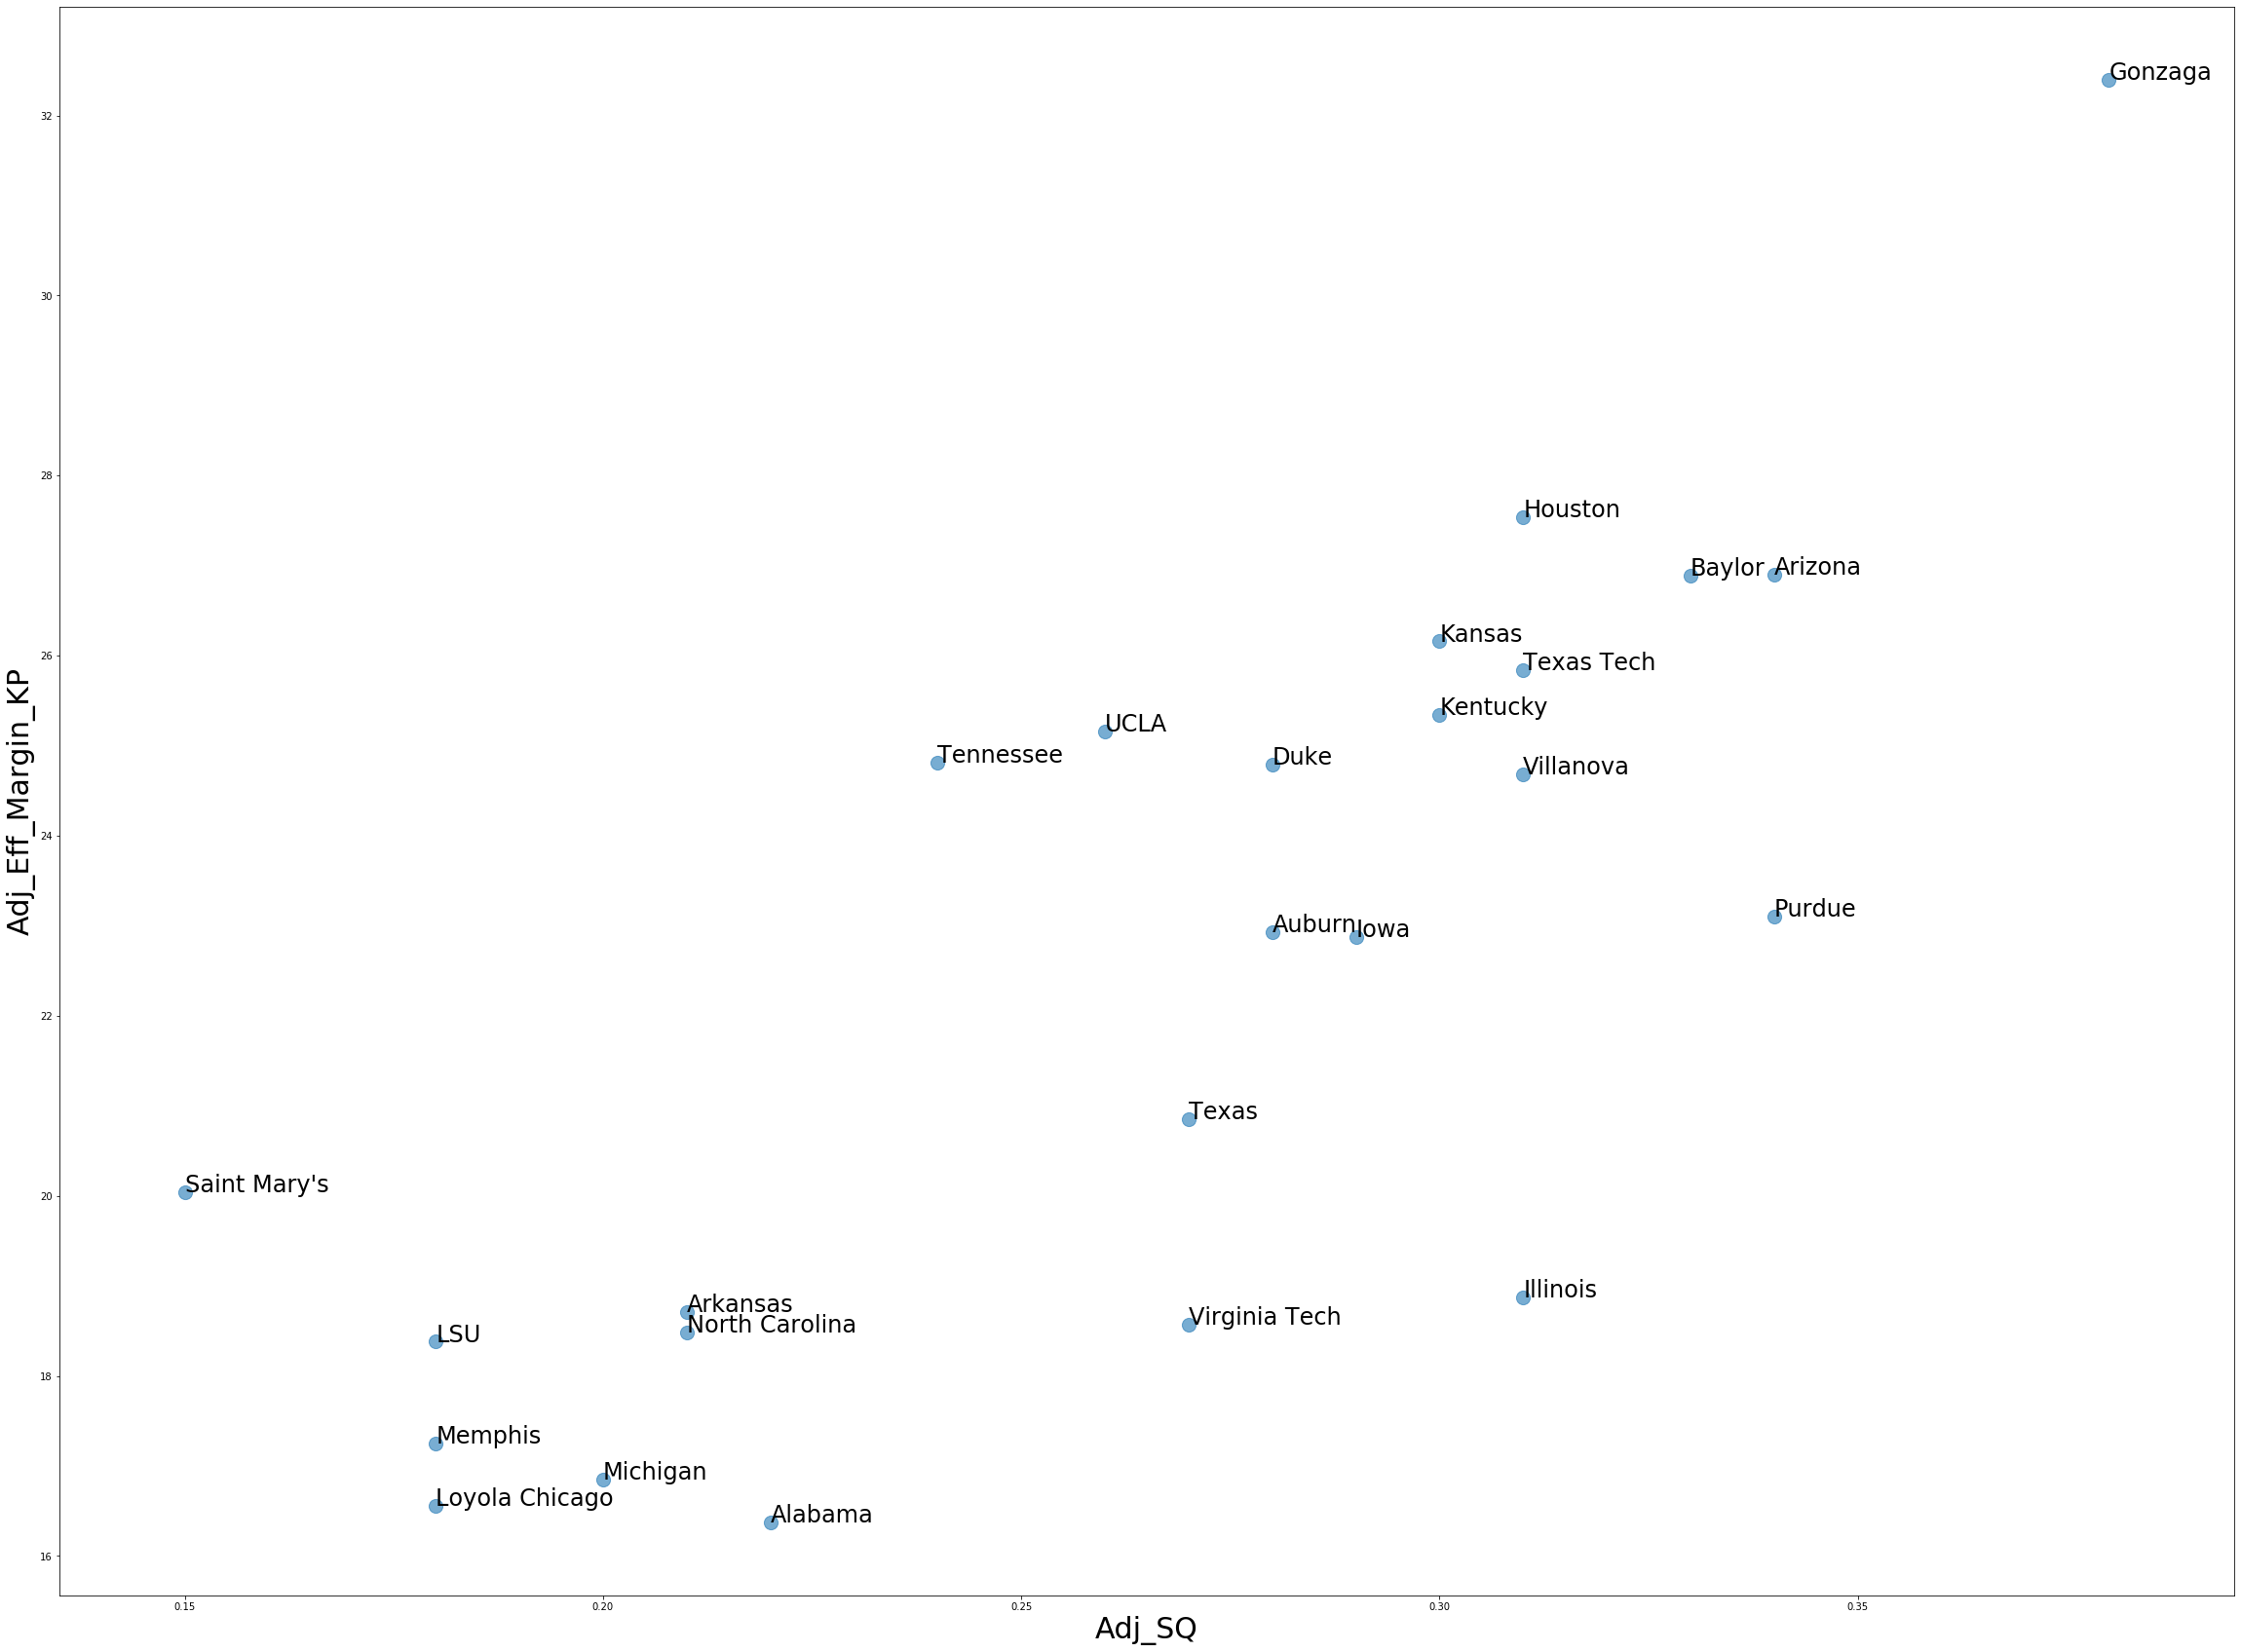

In [20]:
scatter_plot(NCAAB[:25], "Adj_SQ", "Adj_Eff_Margin_KP", False)

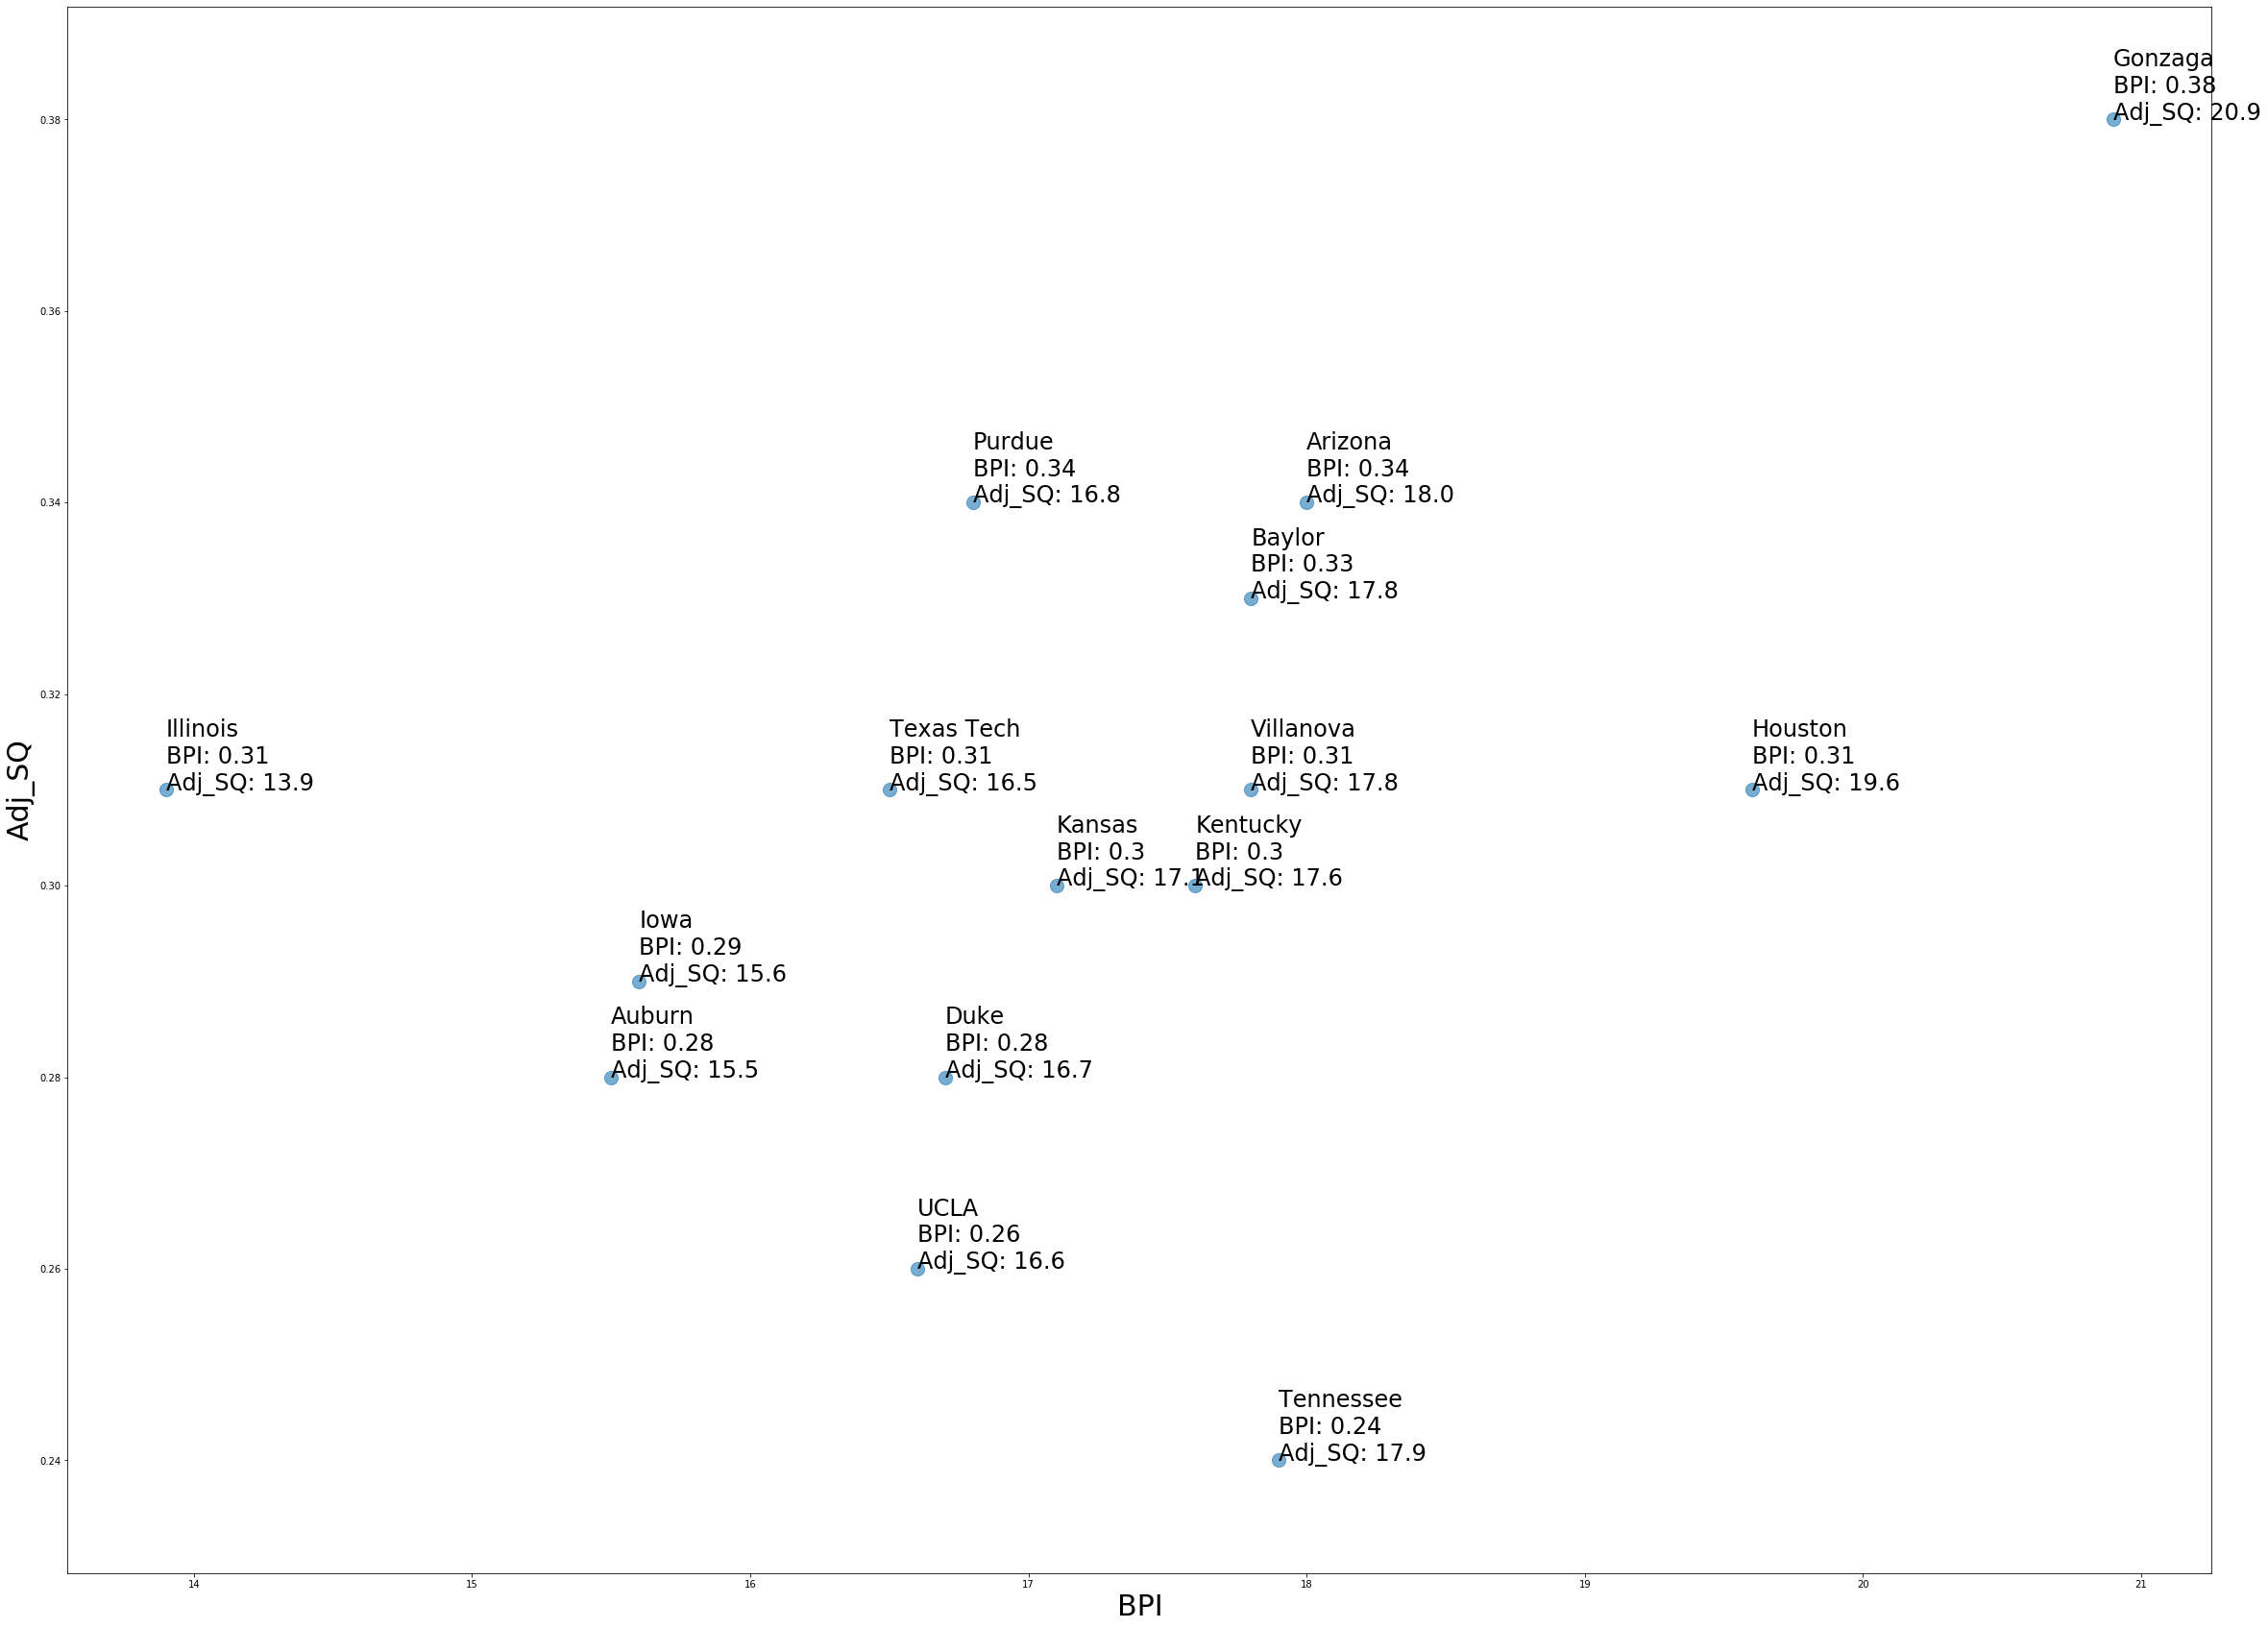

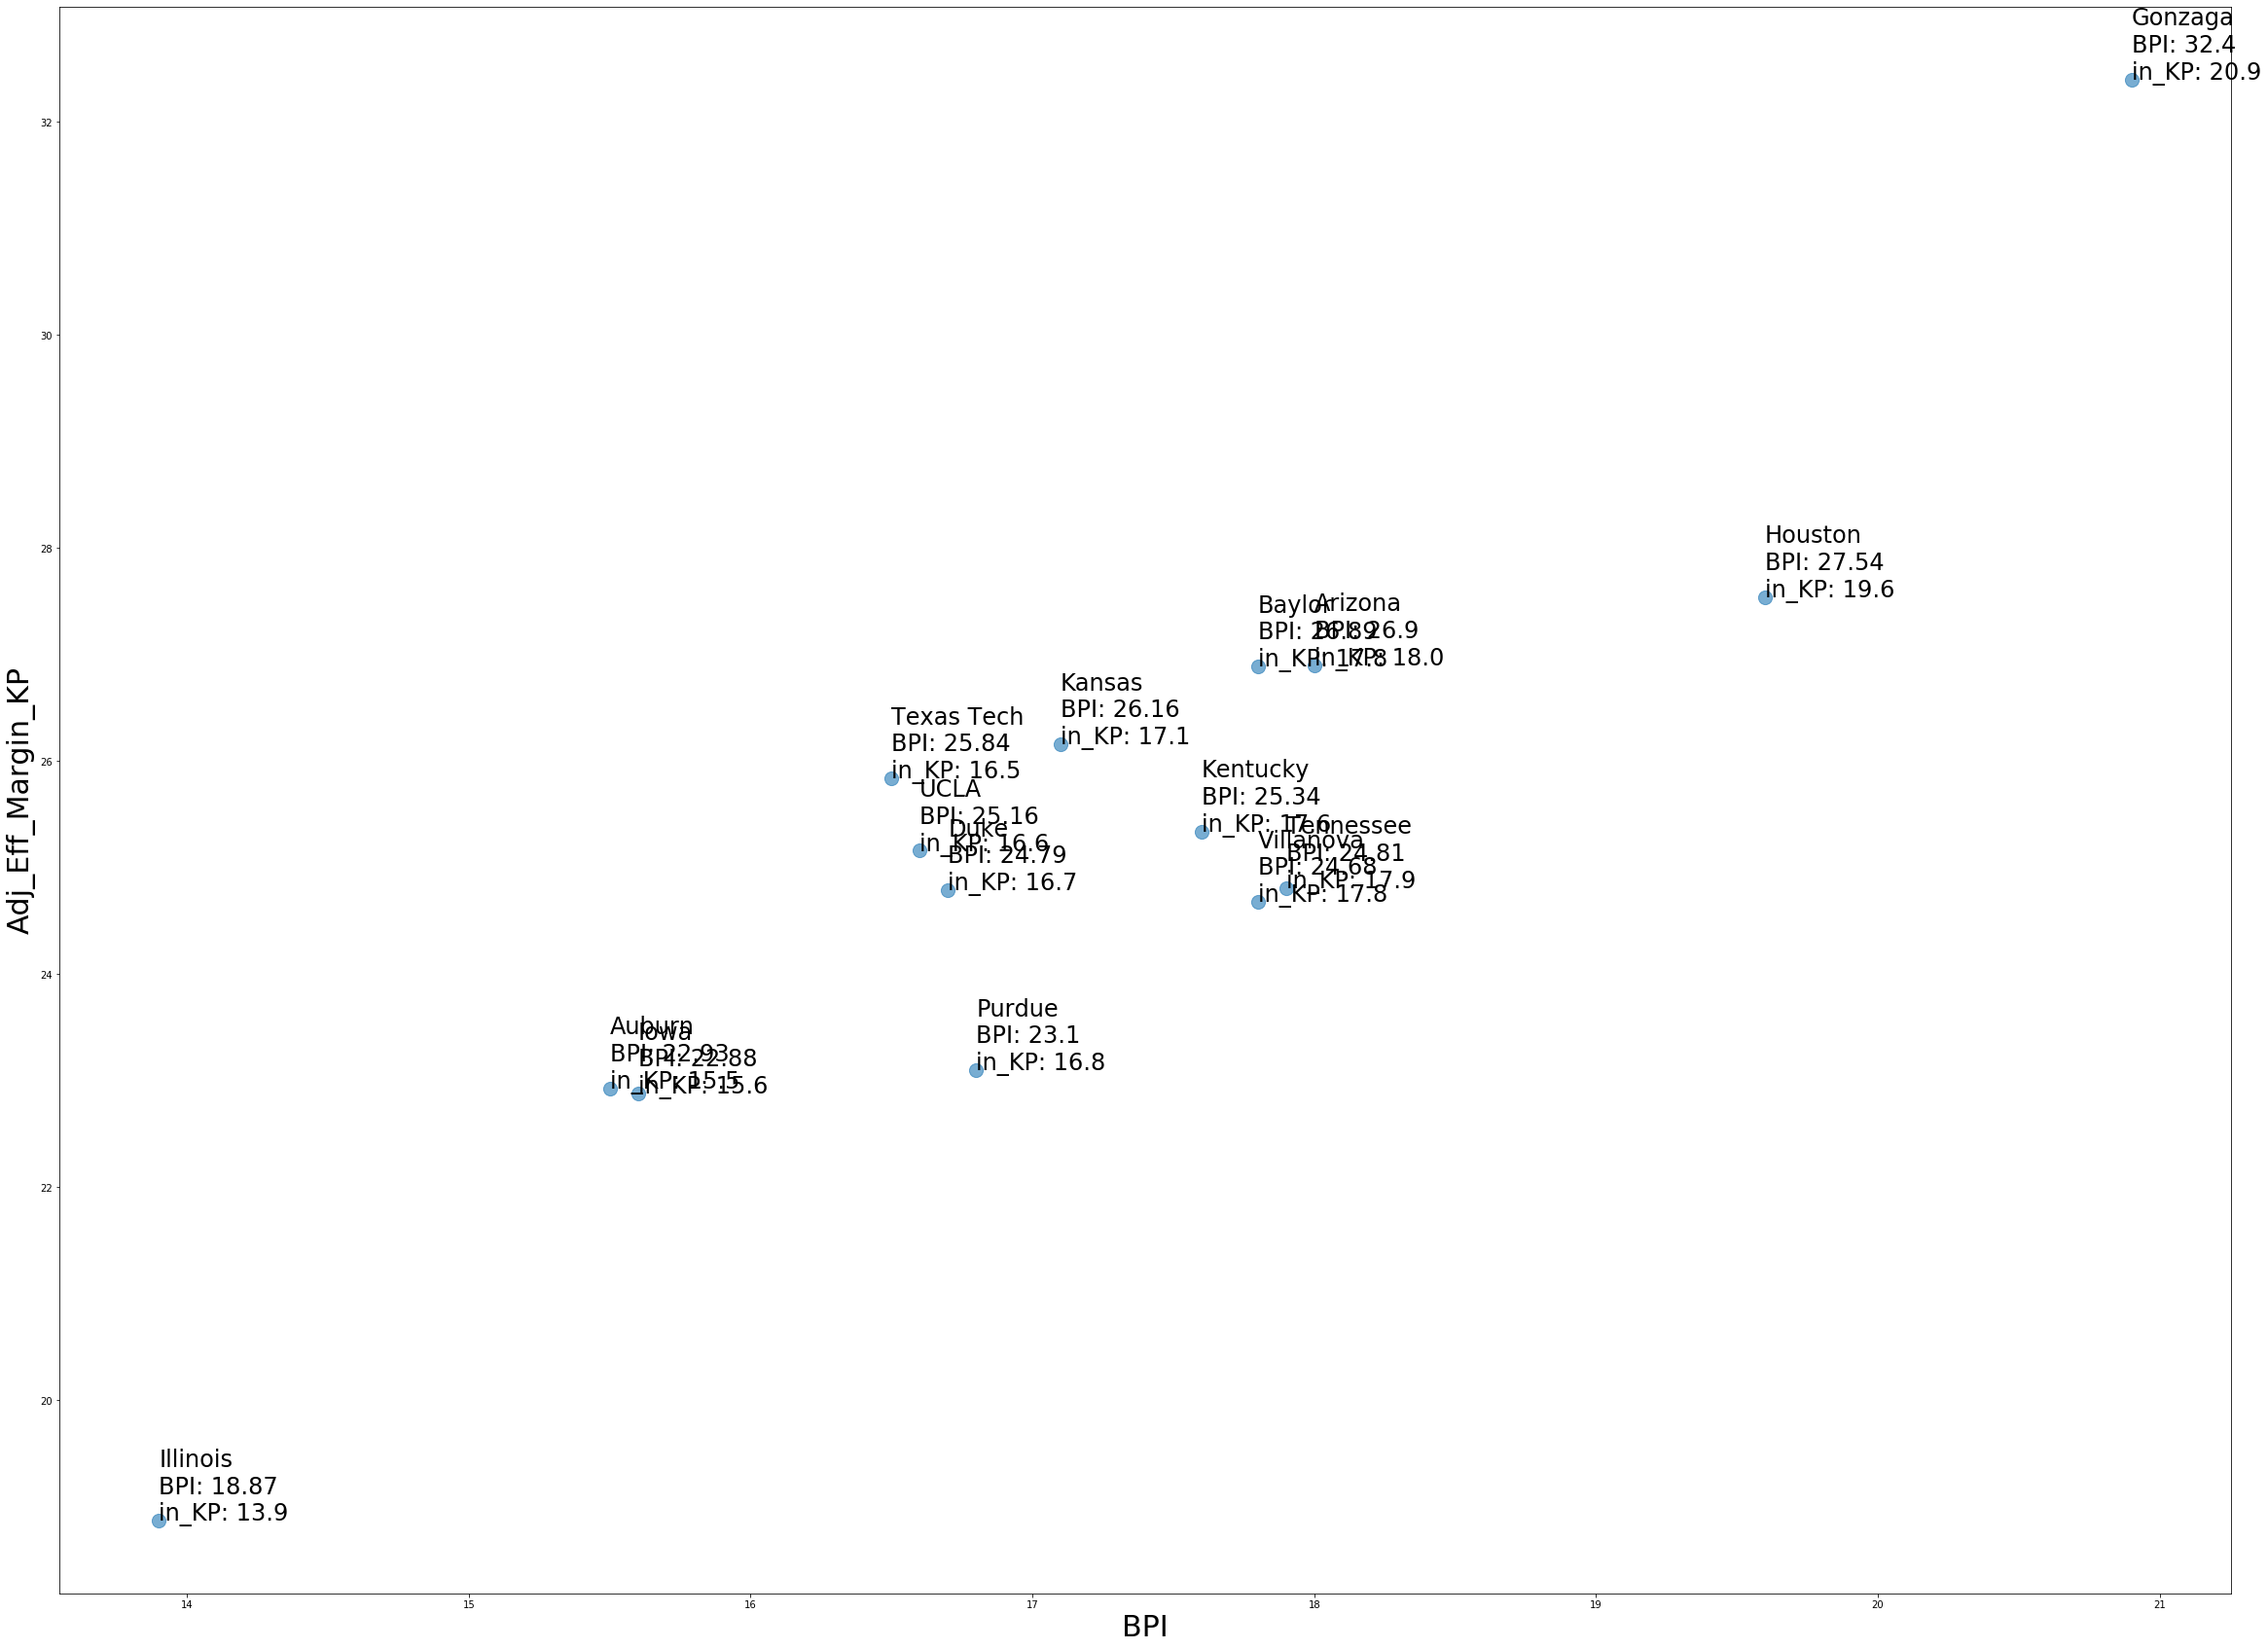

In [21]:
scatter_plot(NCAAB[:15], "BPI", "Adj_SQ", True)
scatter_plot(NCAAB[:15], "BPI", "Adj_Eff_Margin_KP", True)
#scatter_plot(NCAAB[:15], "Adj_Eff_Margin_KP", "Adj_SQ", True)

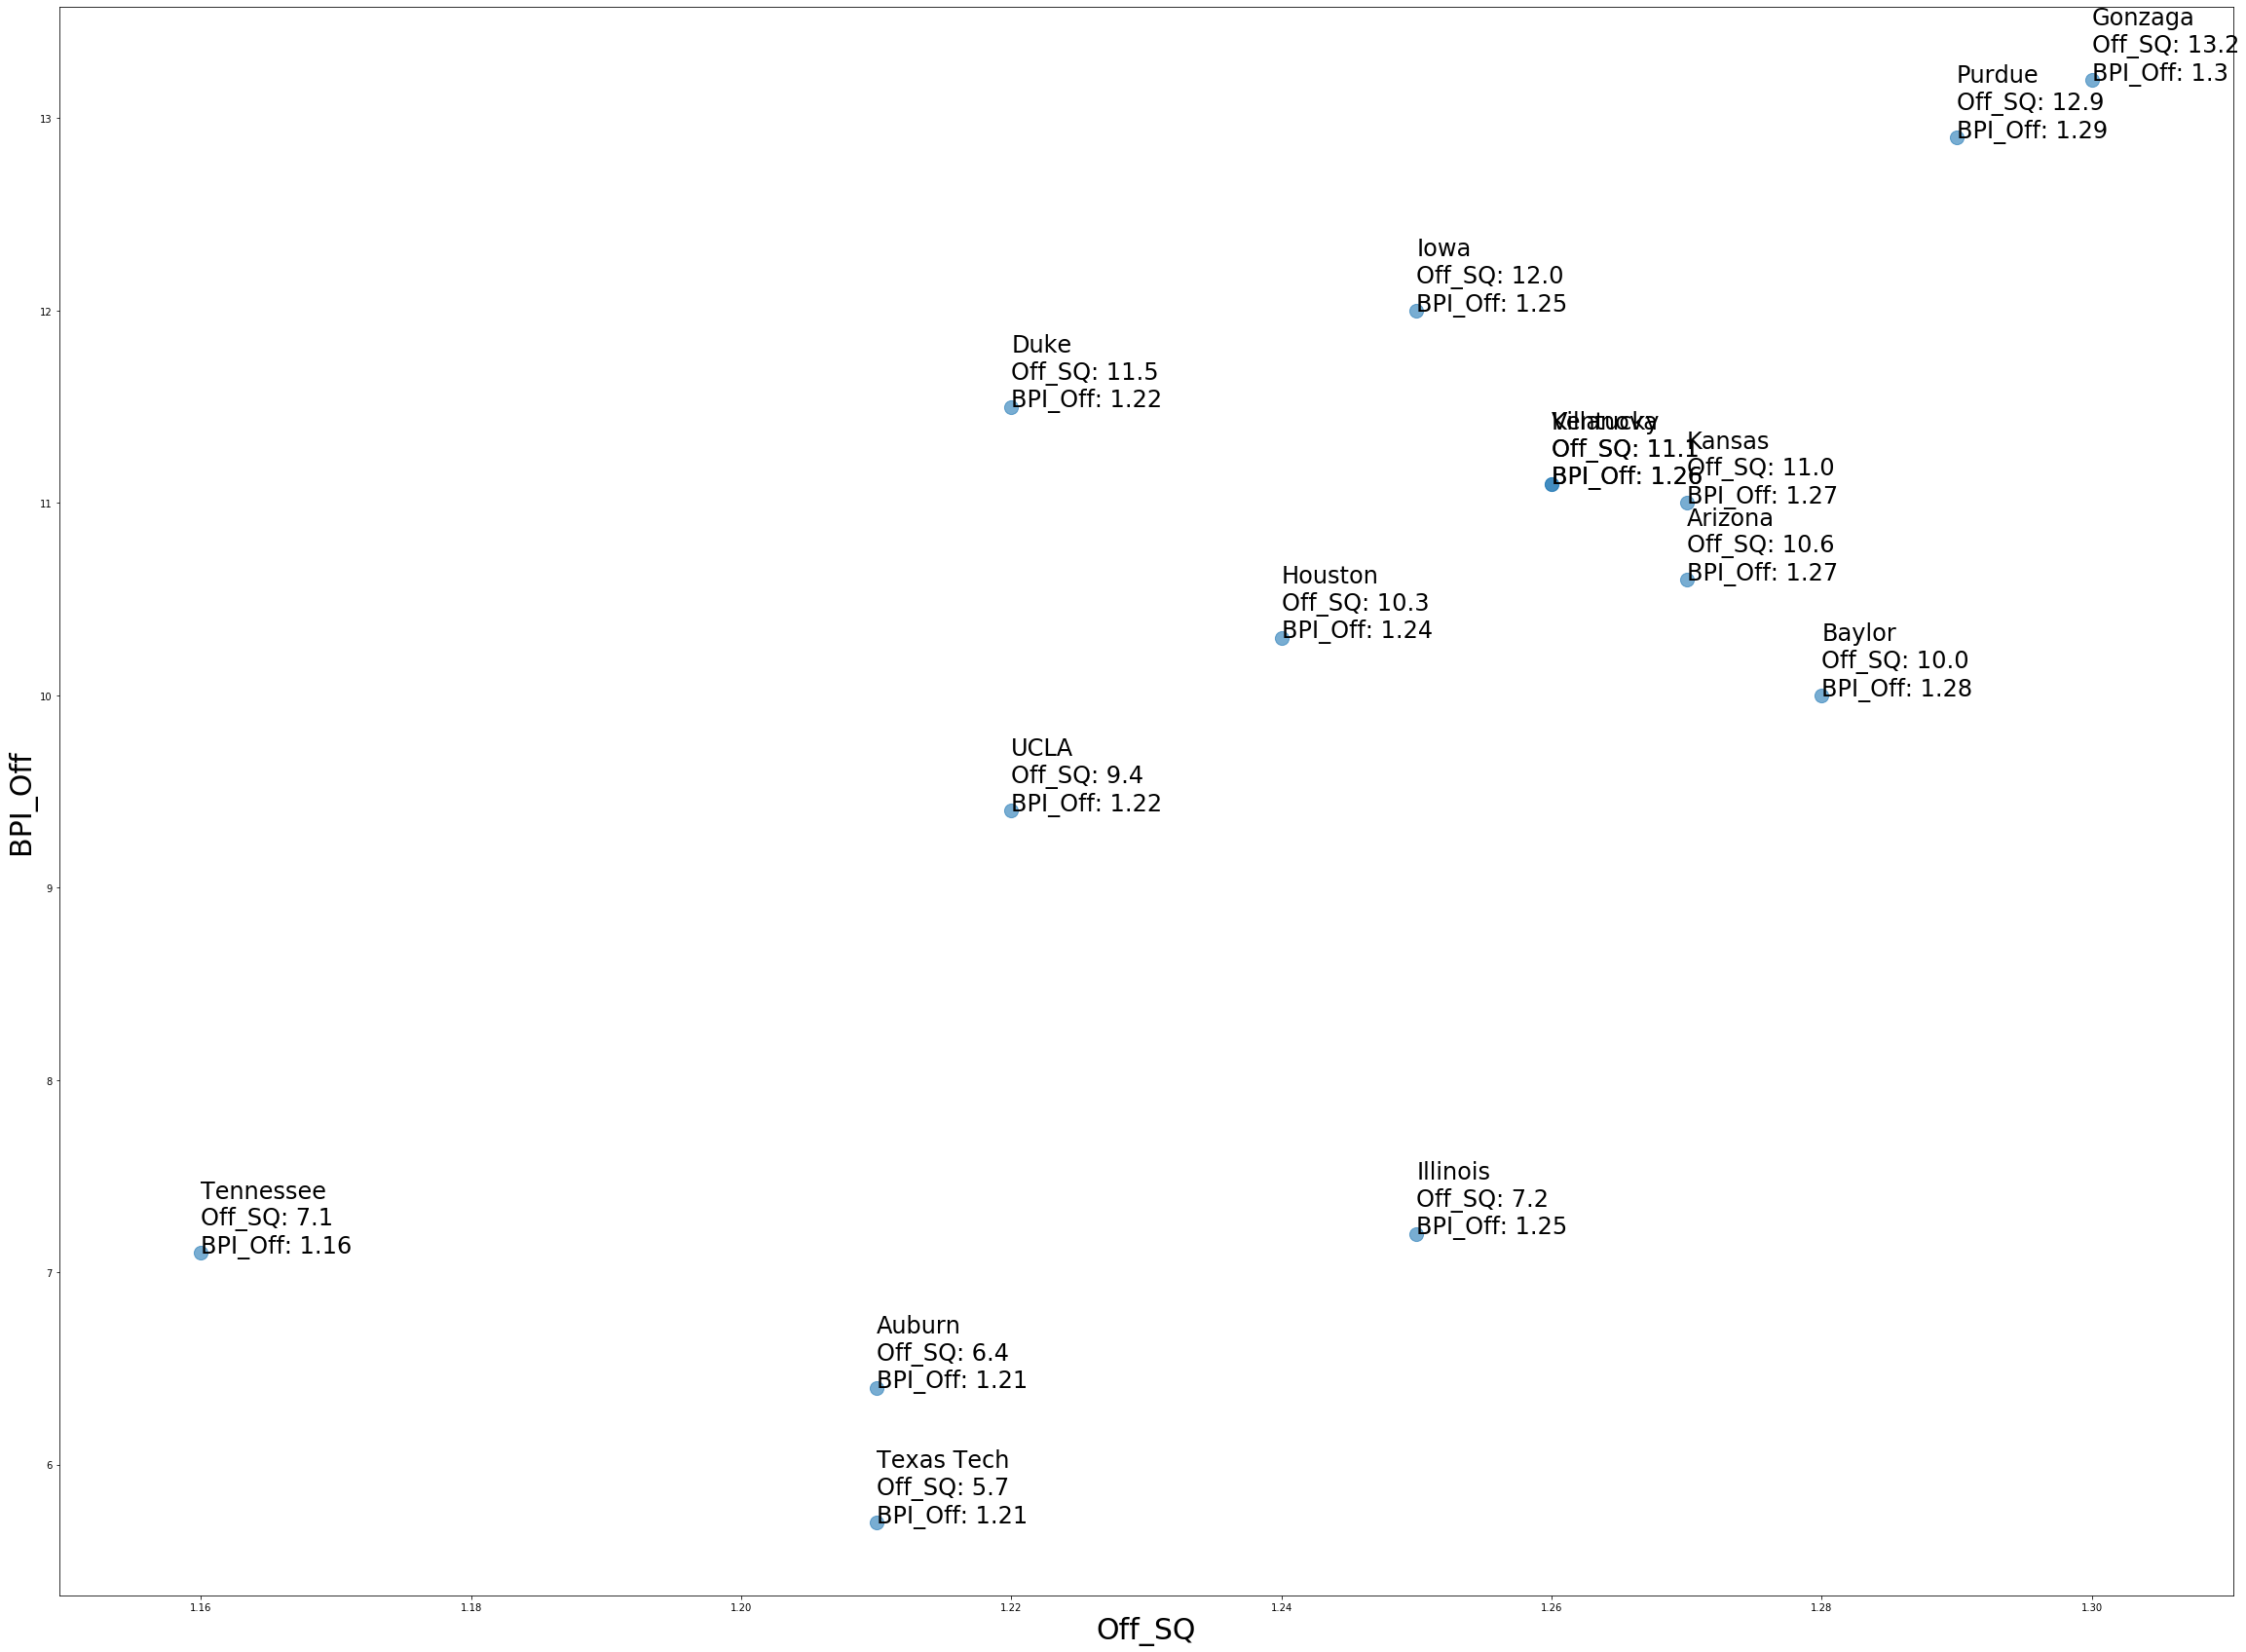

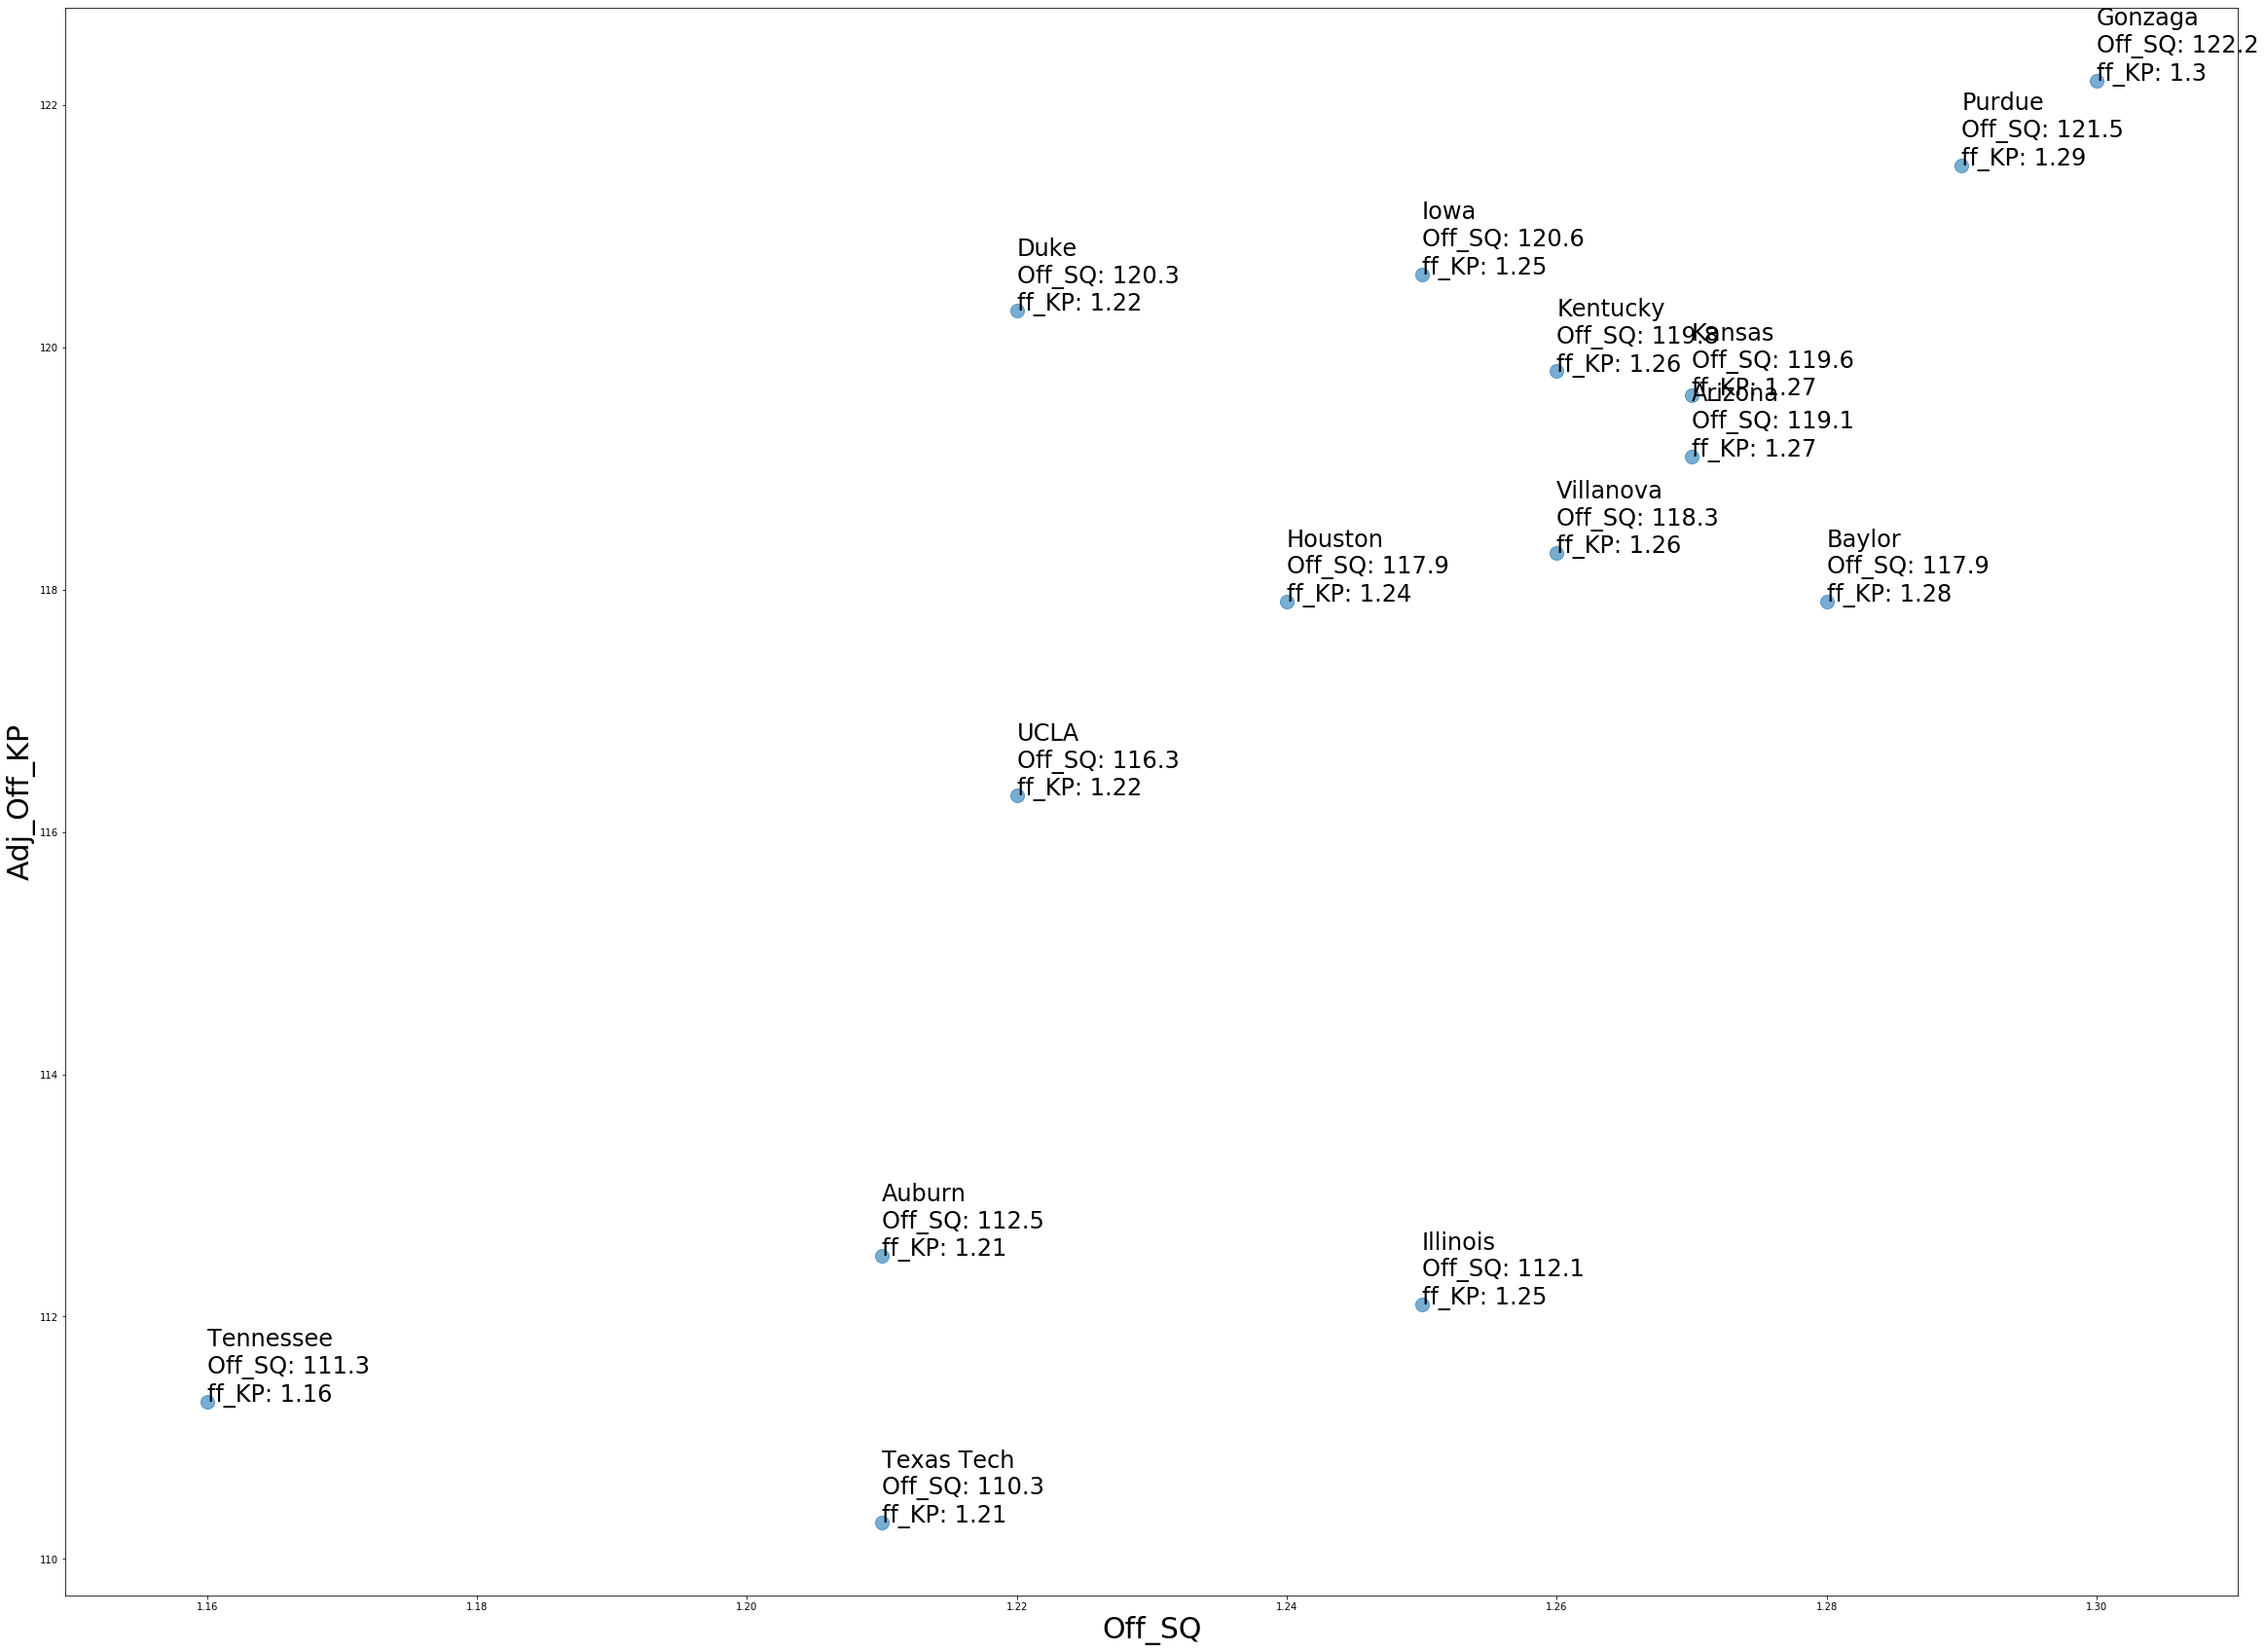

In [22]:
scatter_plot(NCAAB[:15], "Off_SQ", "BPI_Off", True)
scatter_plot(NCAAB[:15], "Off_SQ", "Adj_Off_KP", True)

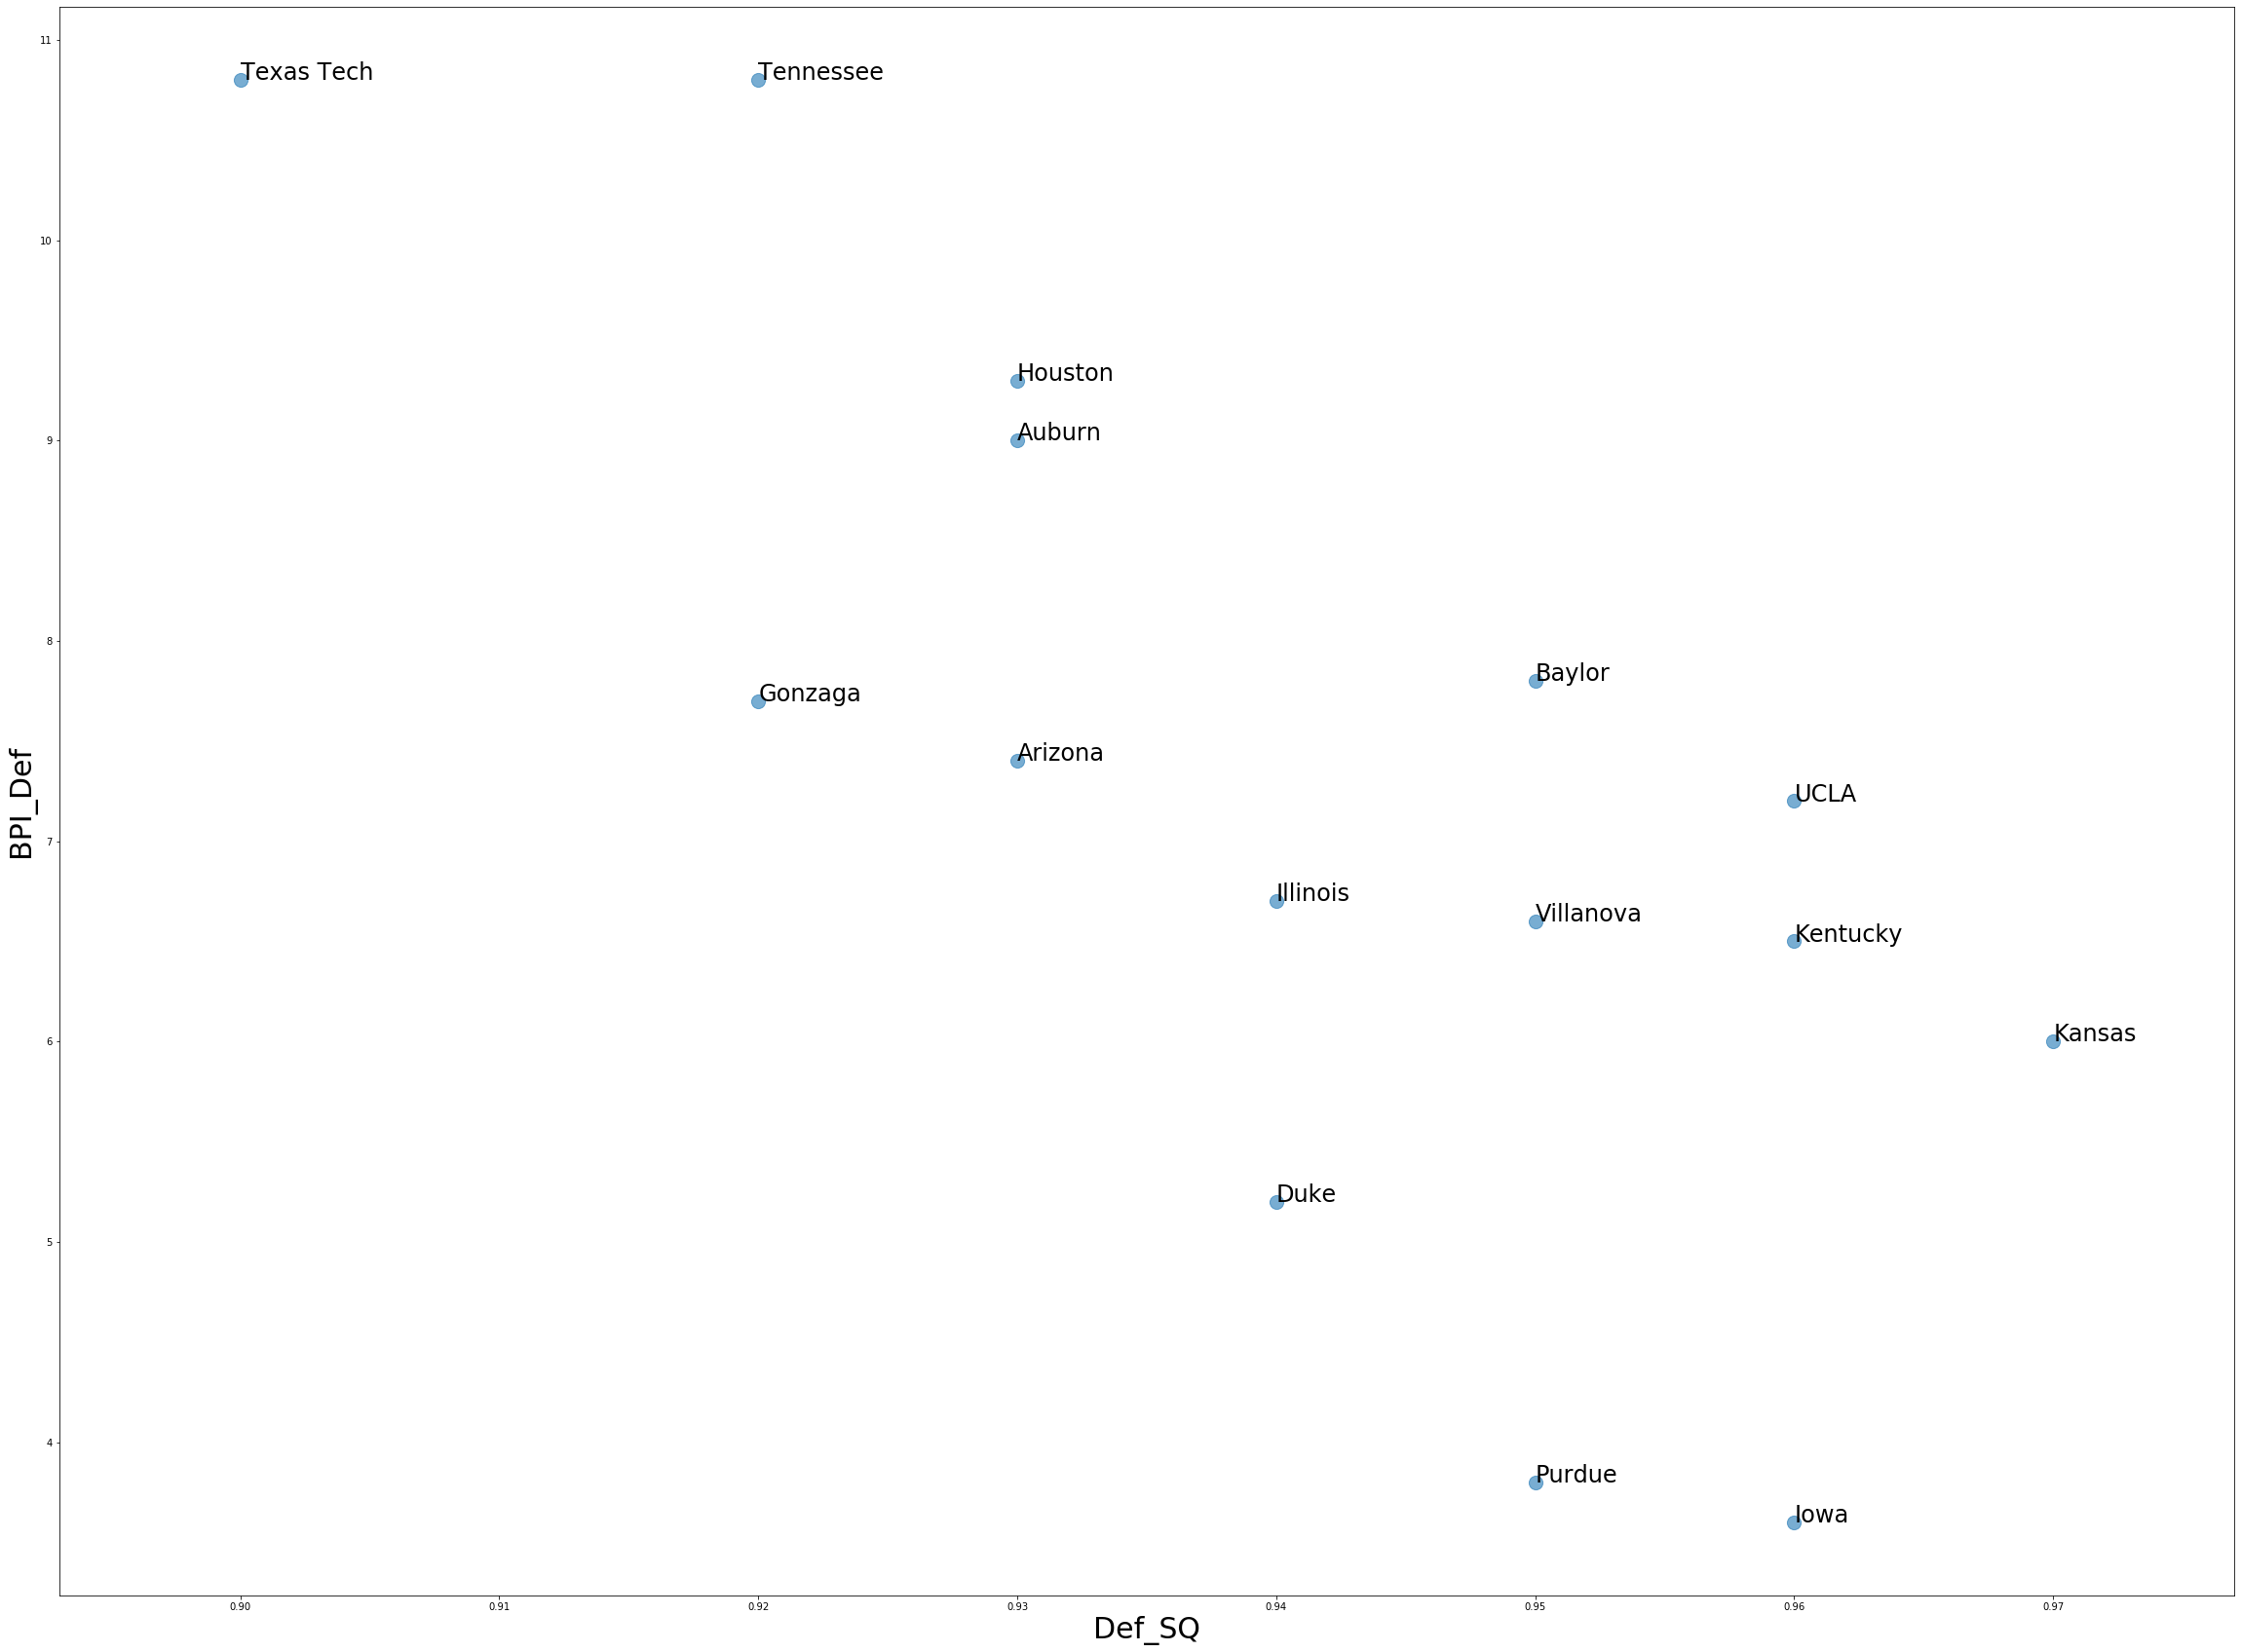

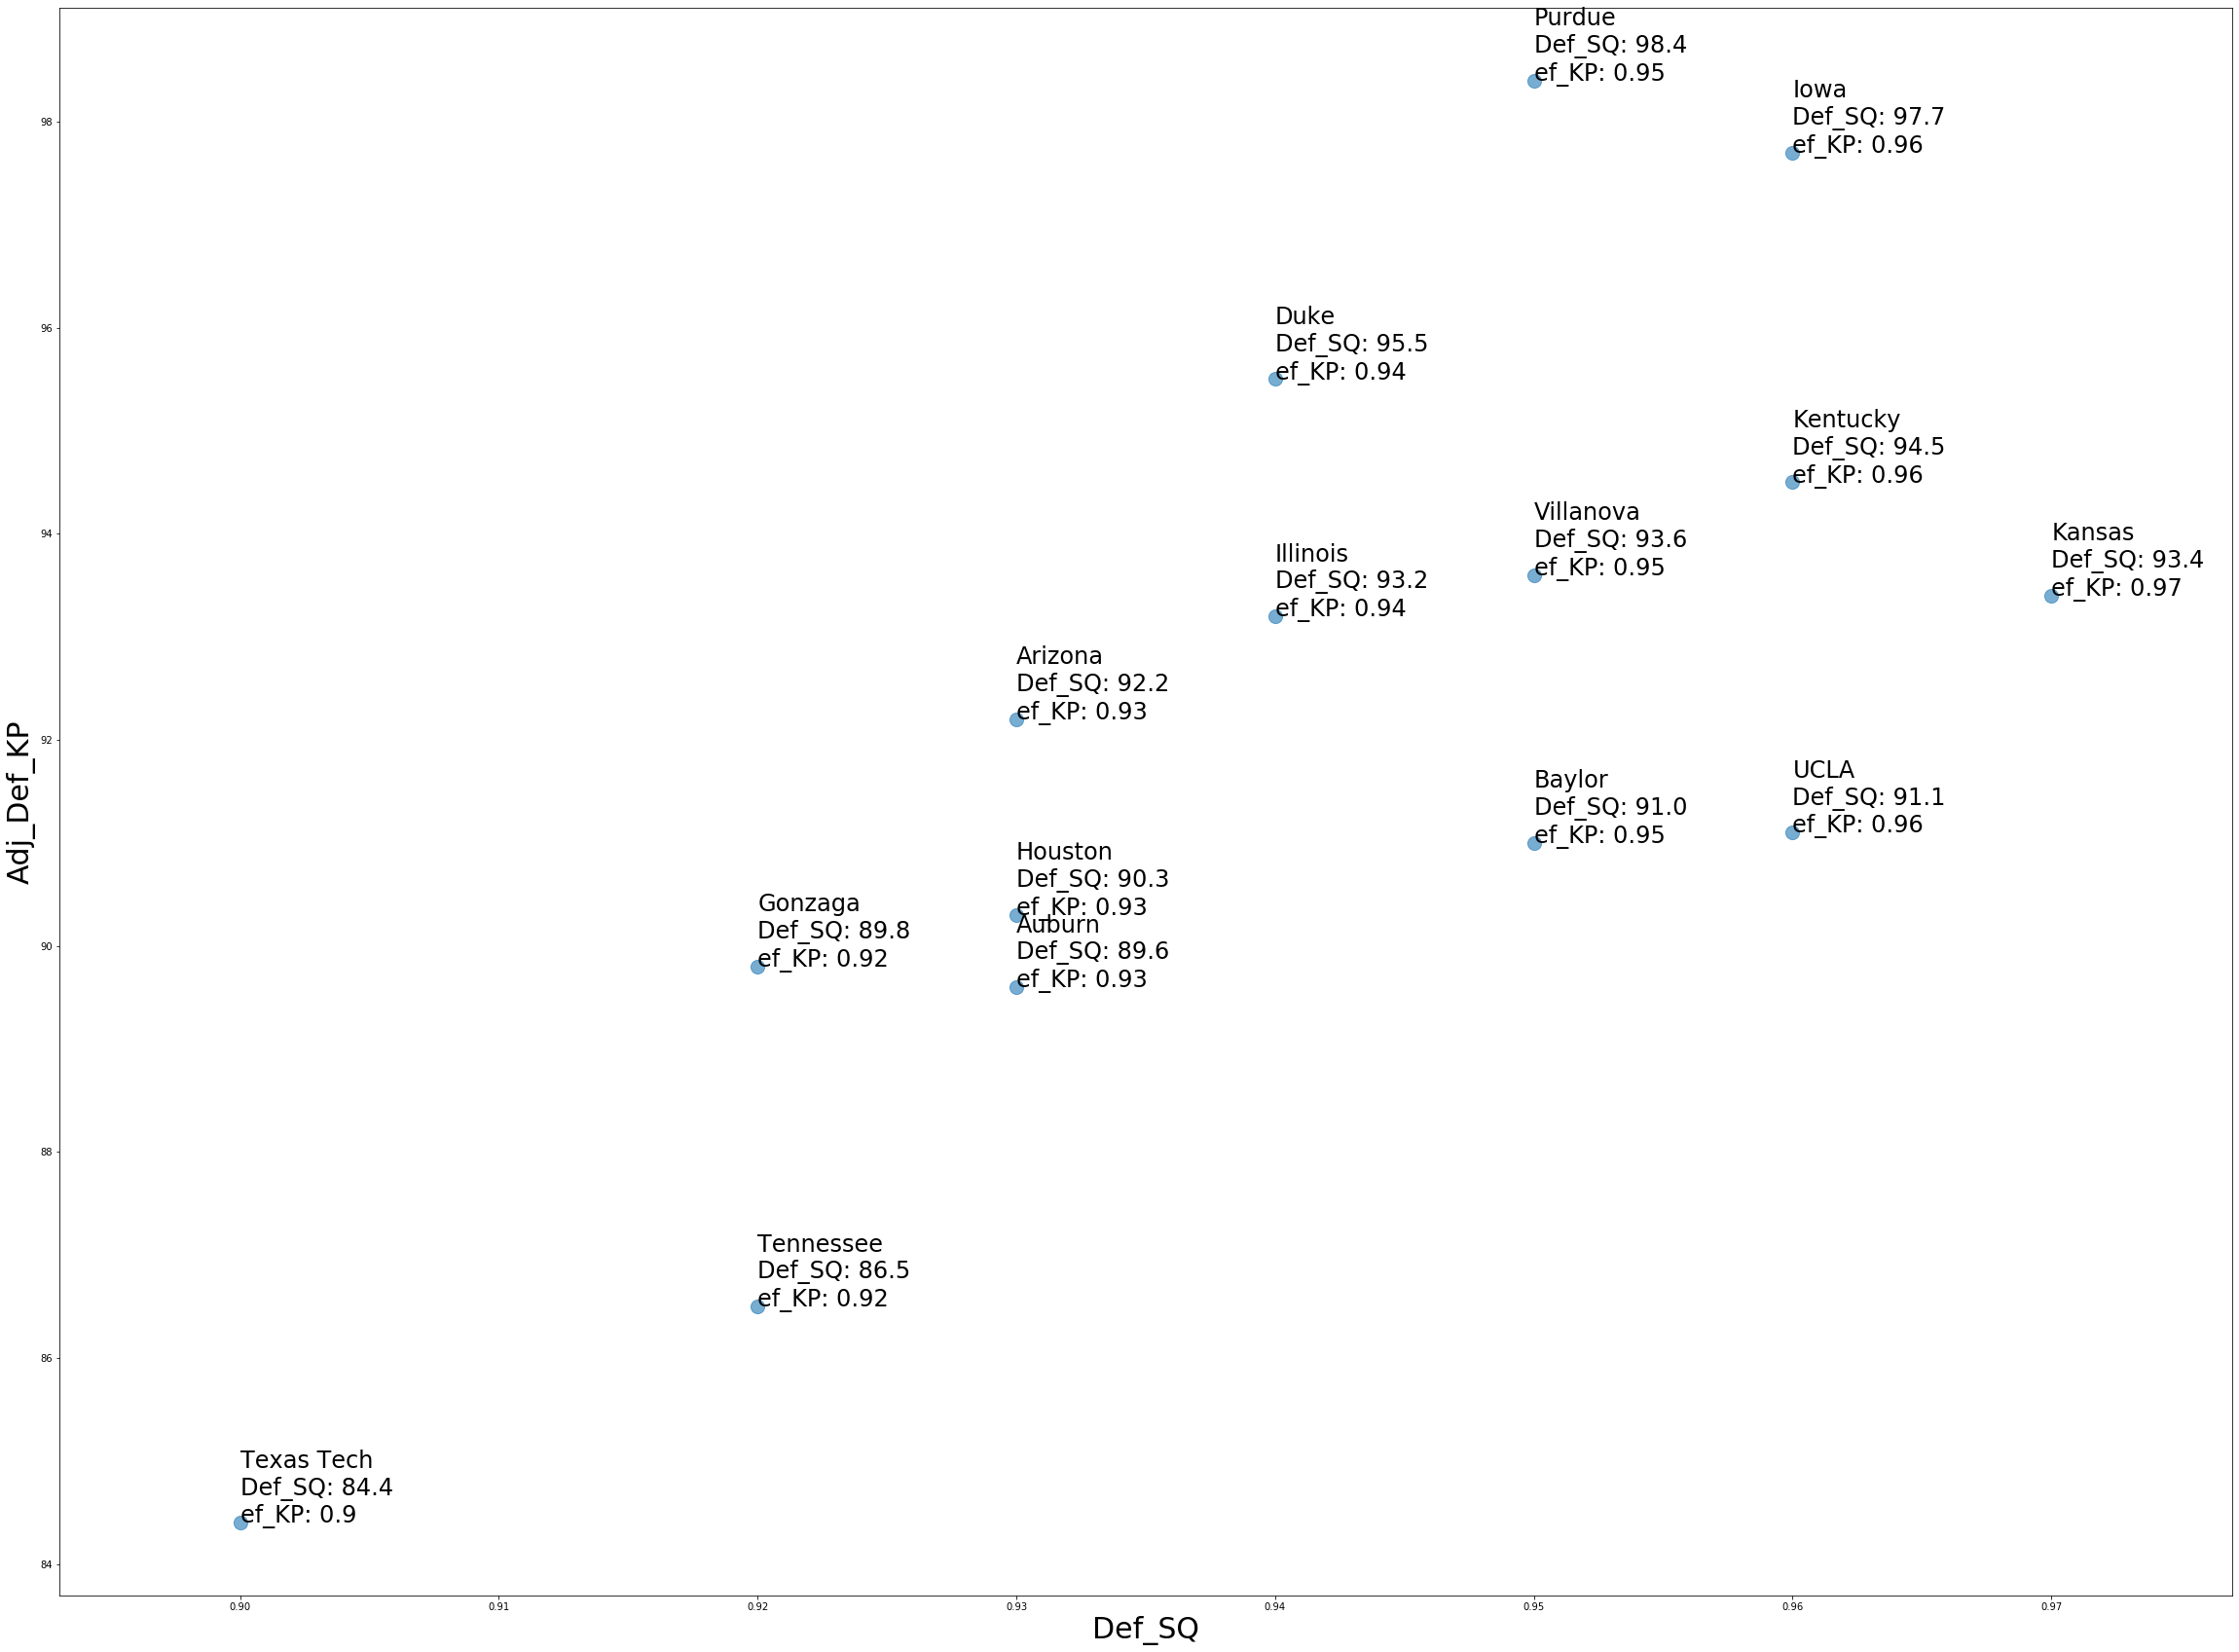

In [23]:
scatter_plot(NCAAB[:15], "Def_SQ", "BPI_Def", False)
scatter_plot(NCAAB[:15], "Def_SQ", "Adj_Def_KP", True)

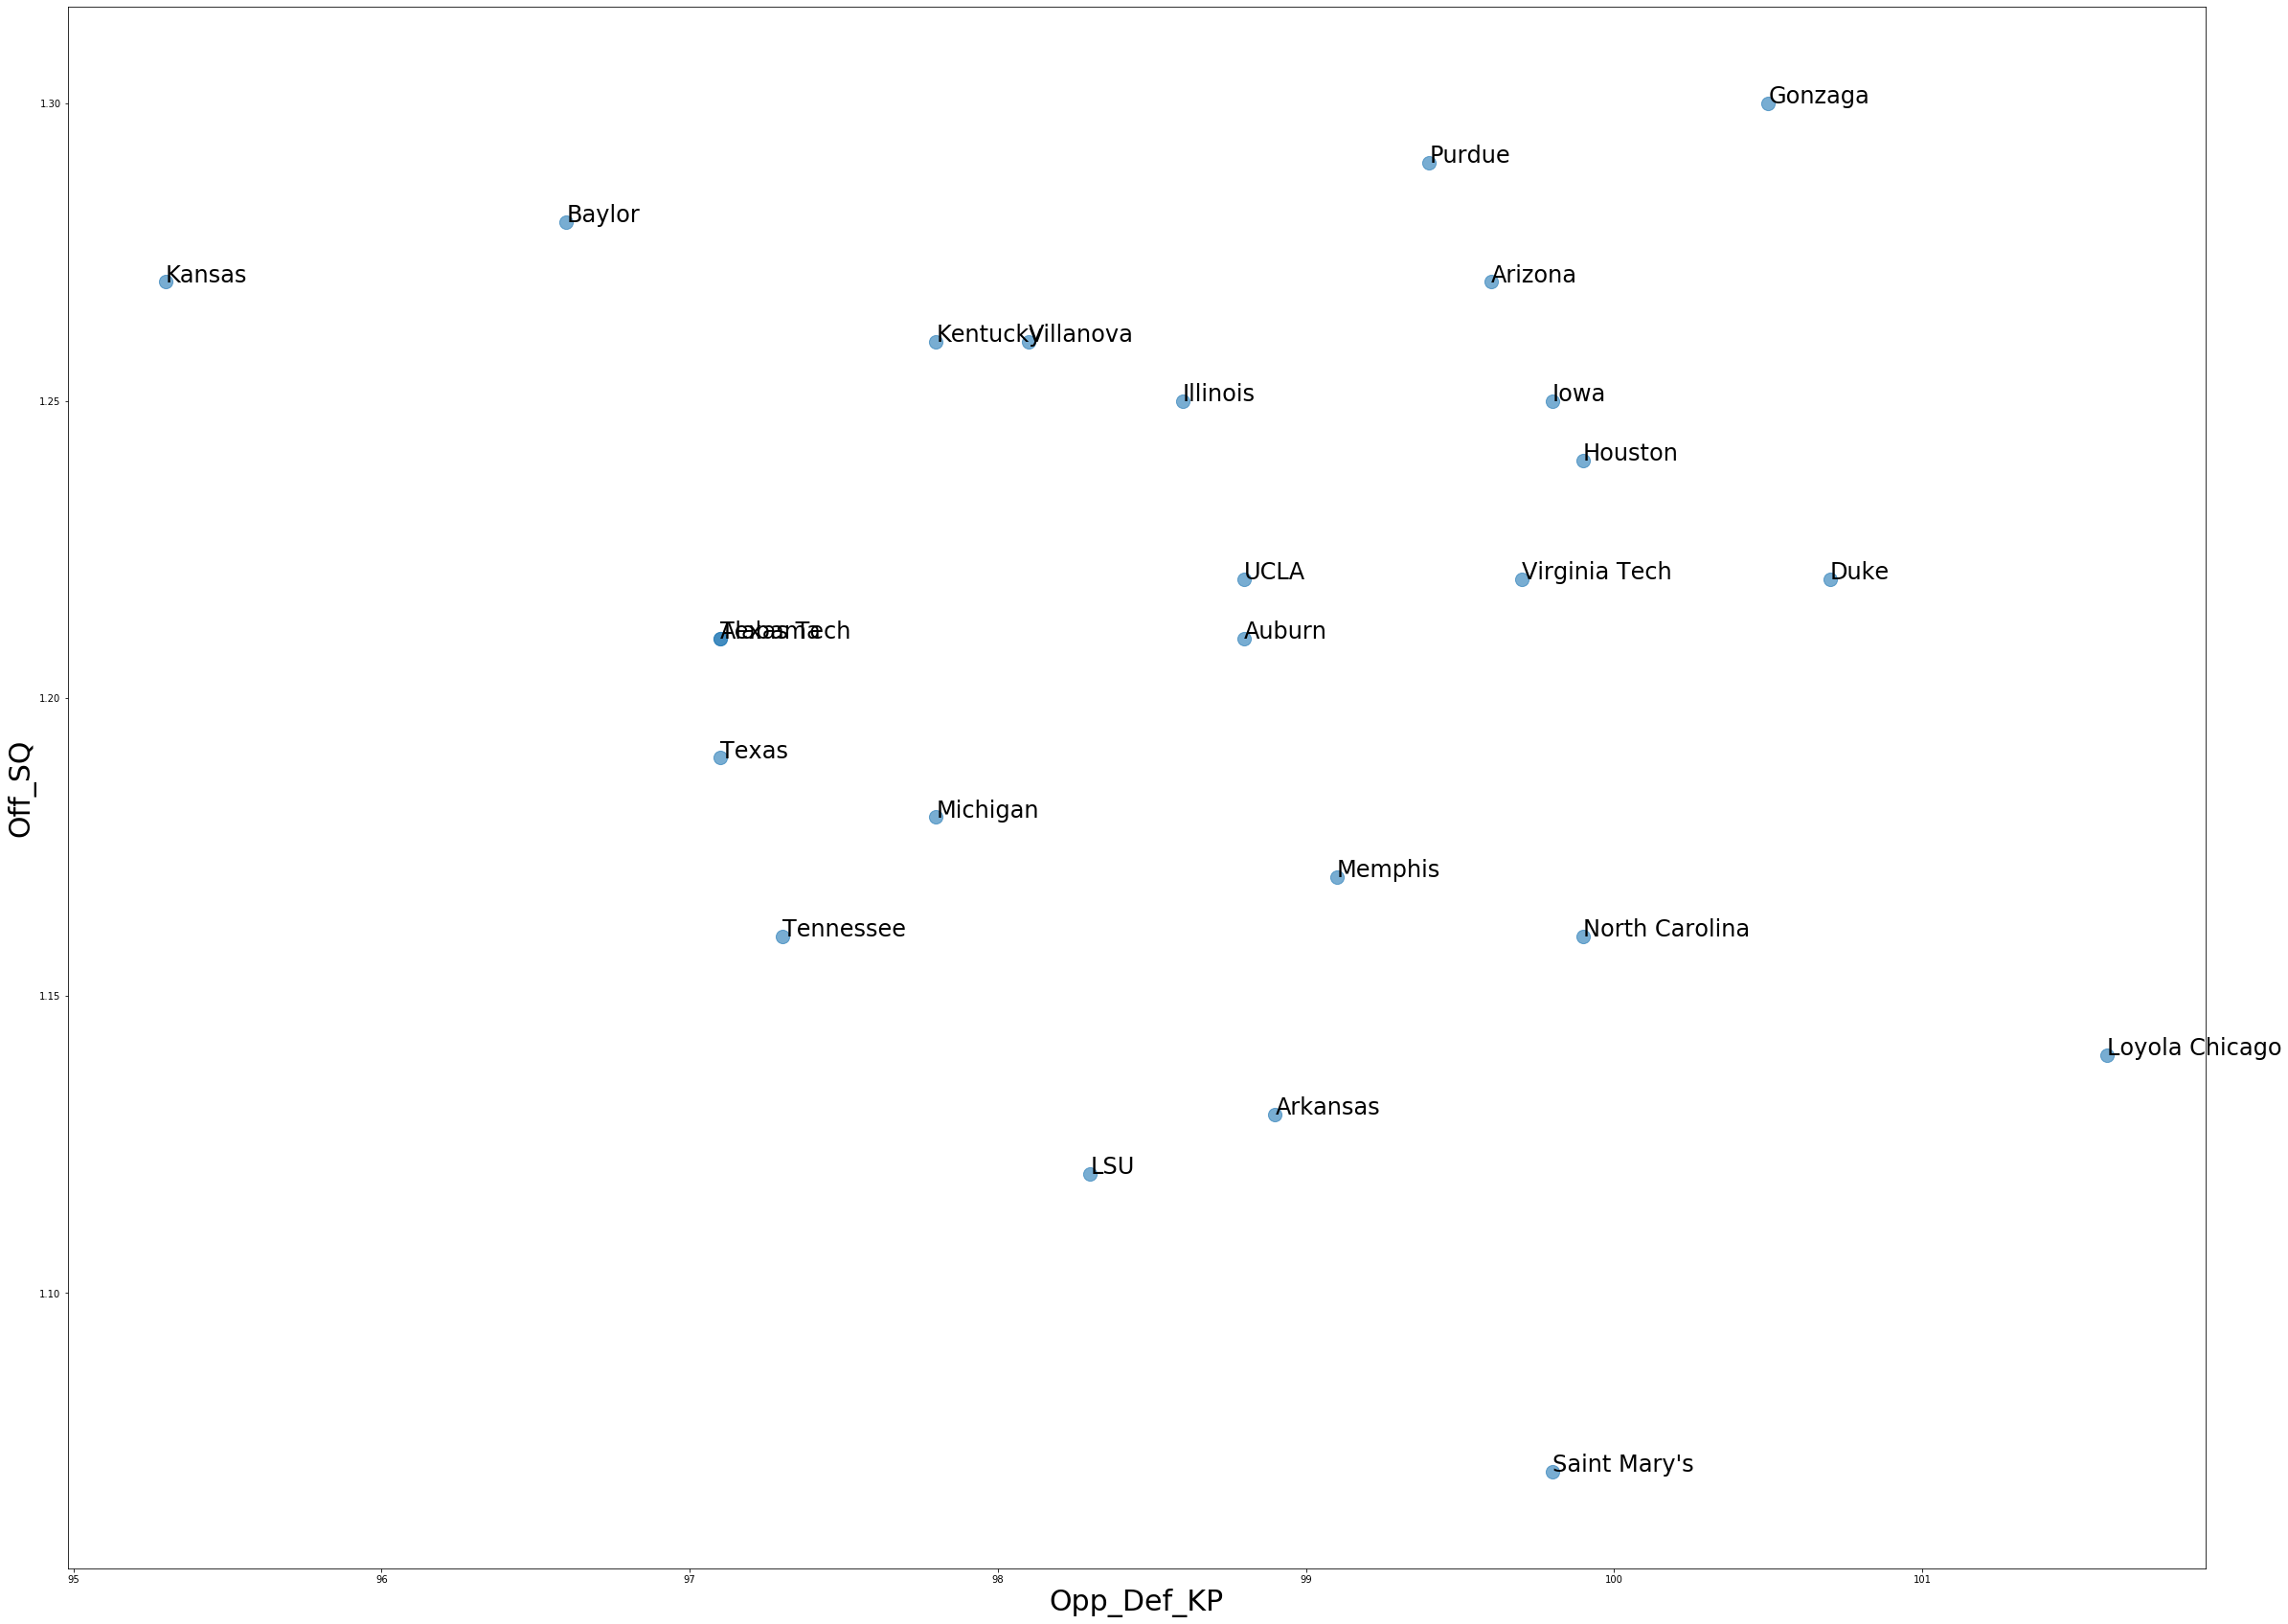

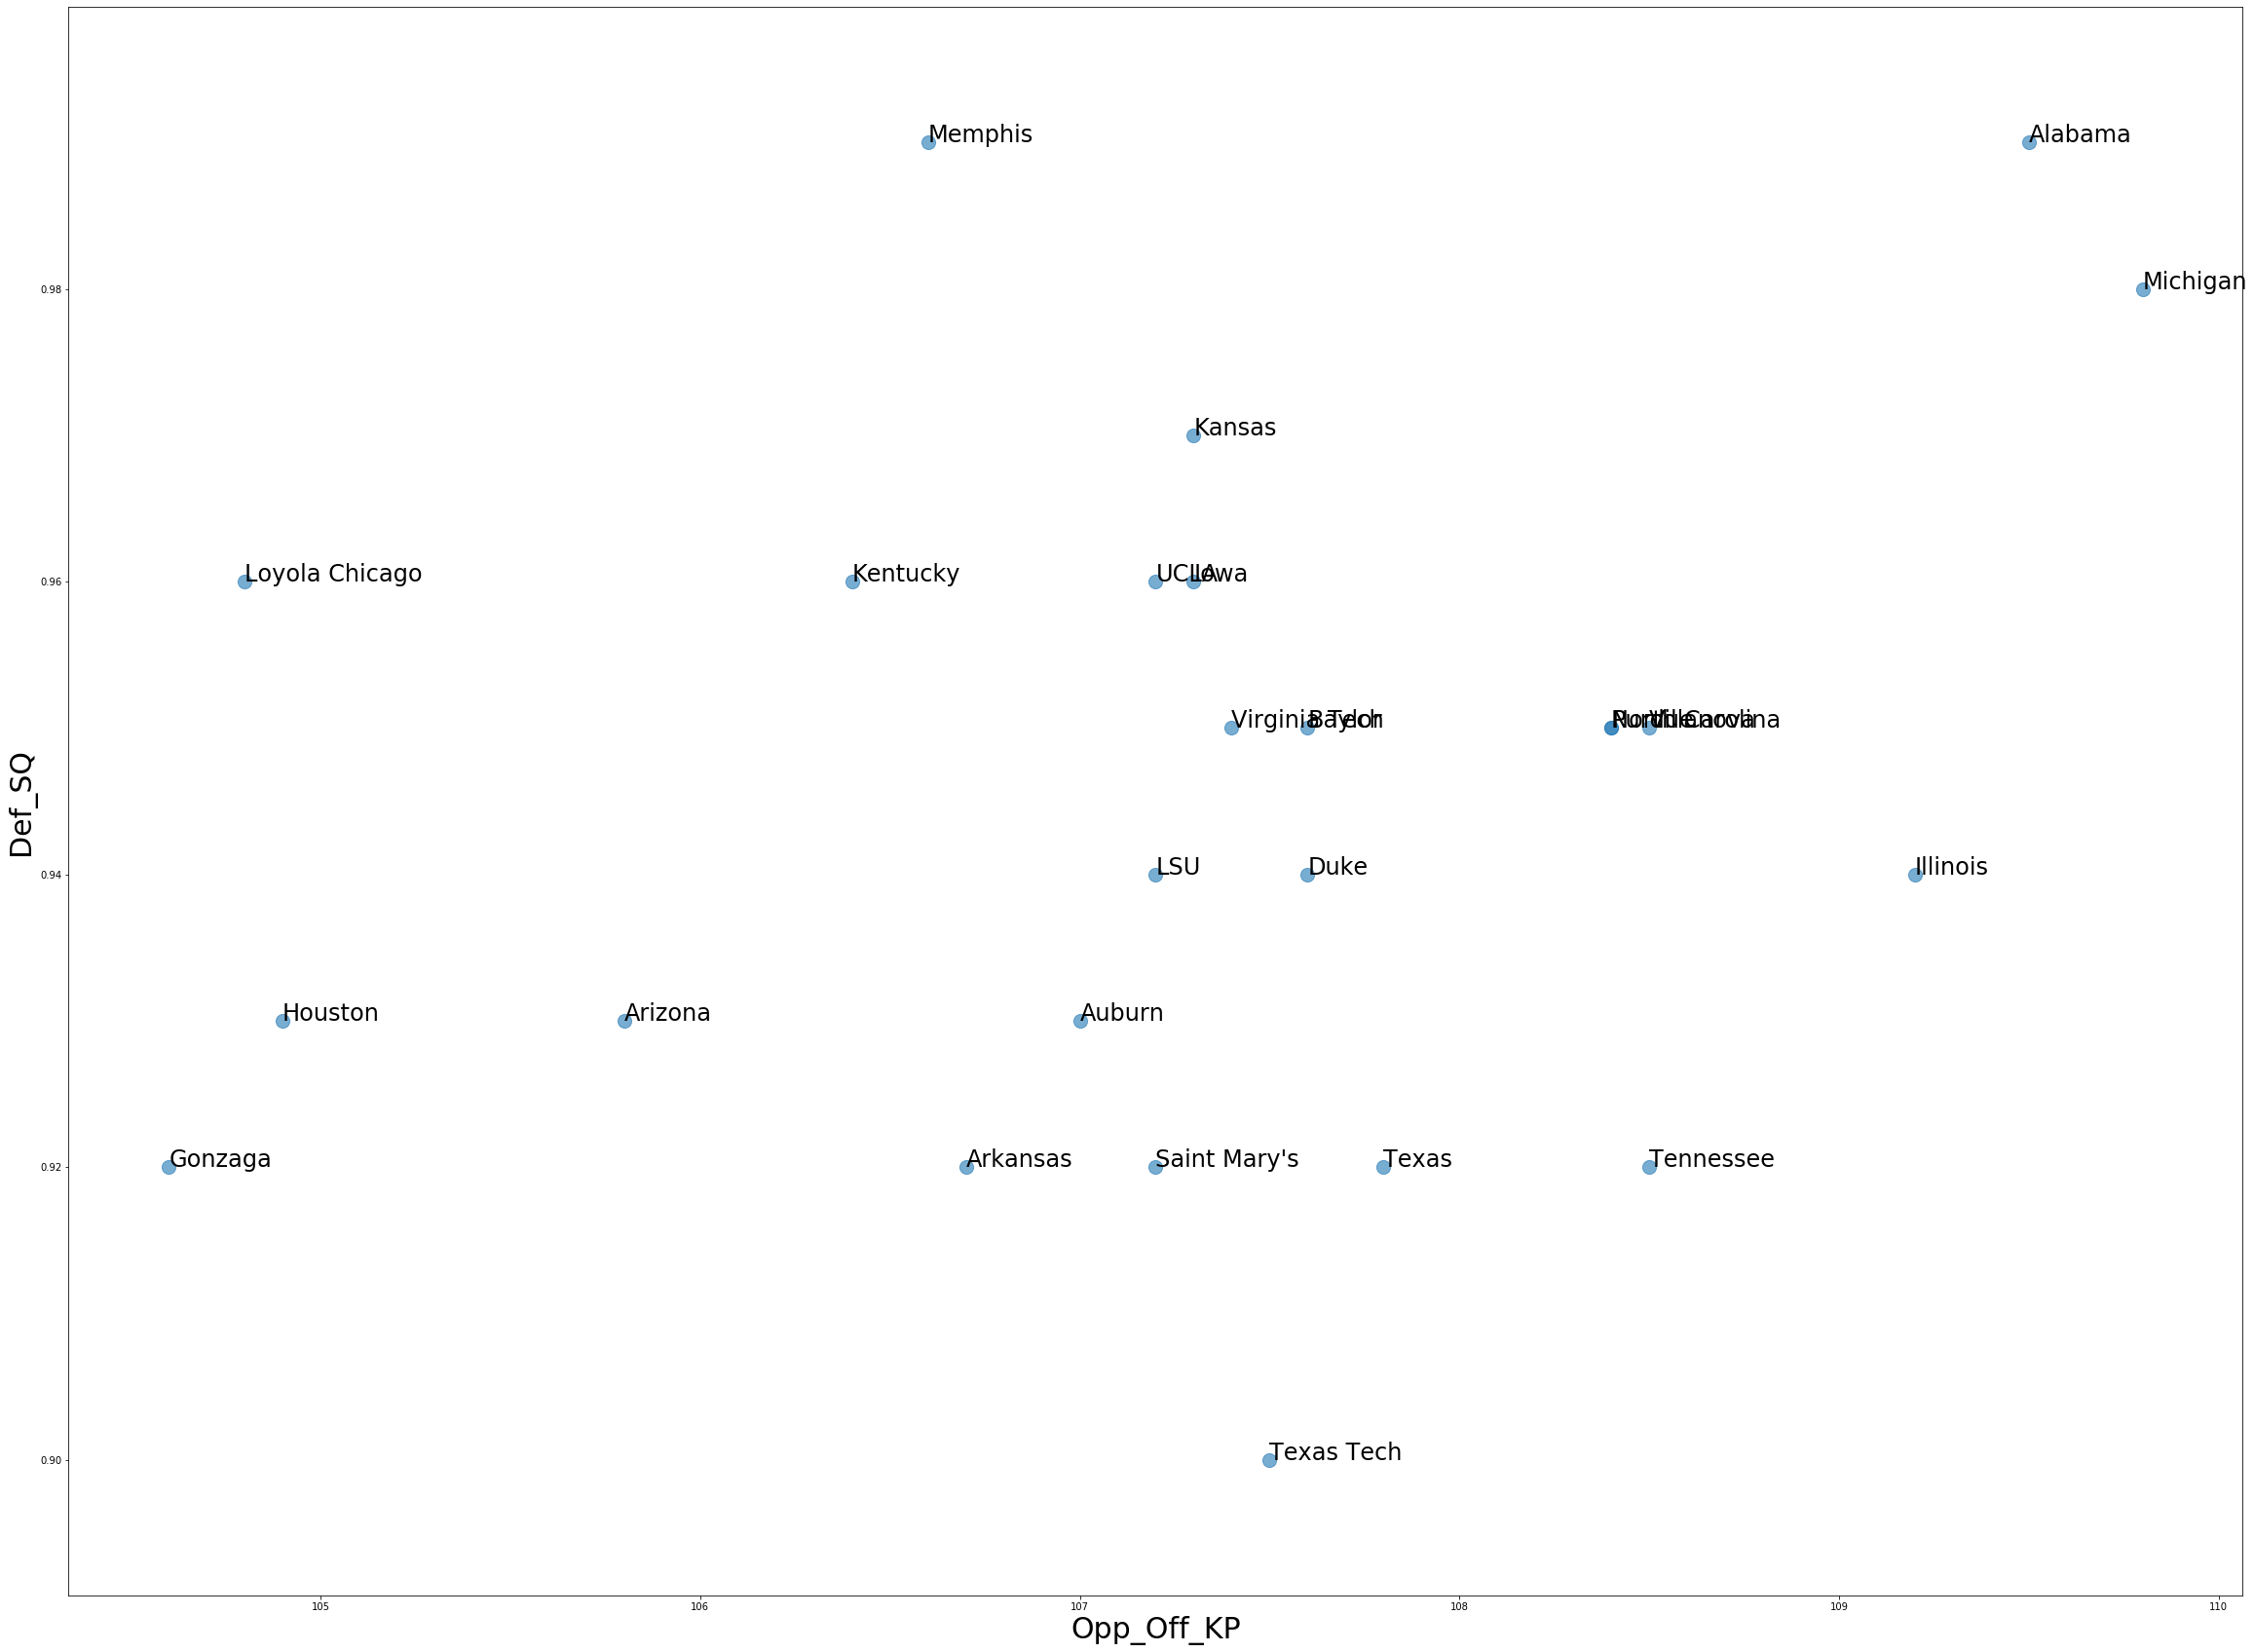

In [24]:
scatter_plot(NCAAB[:25], "Opp_Def_KP", "Off_SQ", False)
scatter_plot(NCAAB[:25], "Opp_Off_KP", "Def_SQ", False)

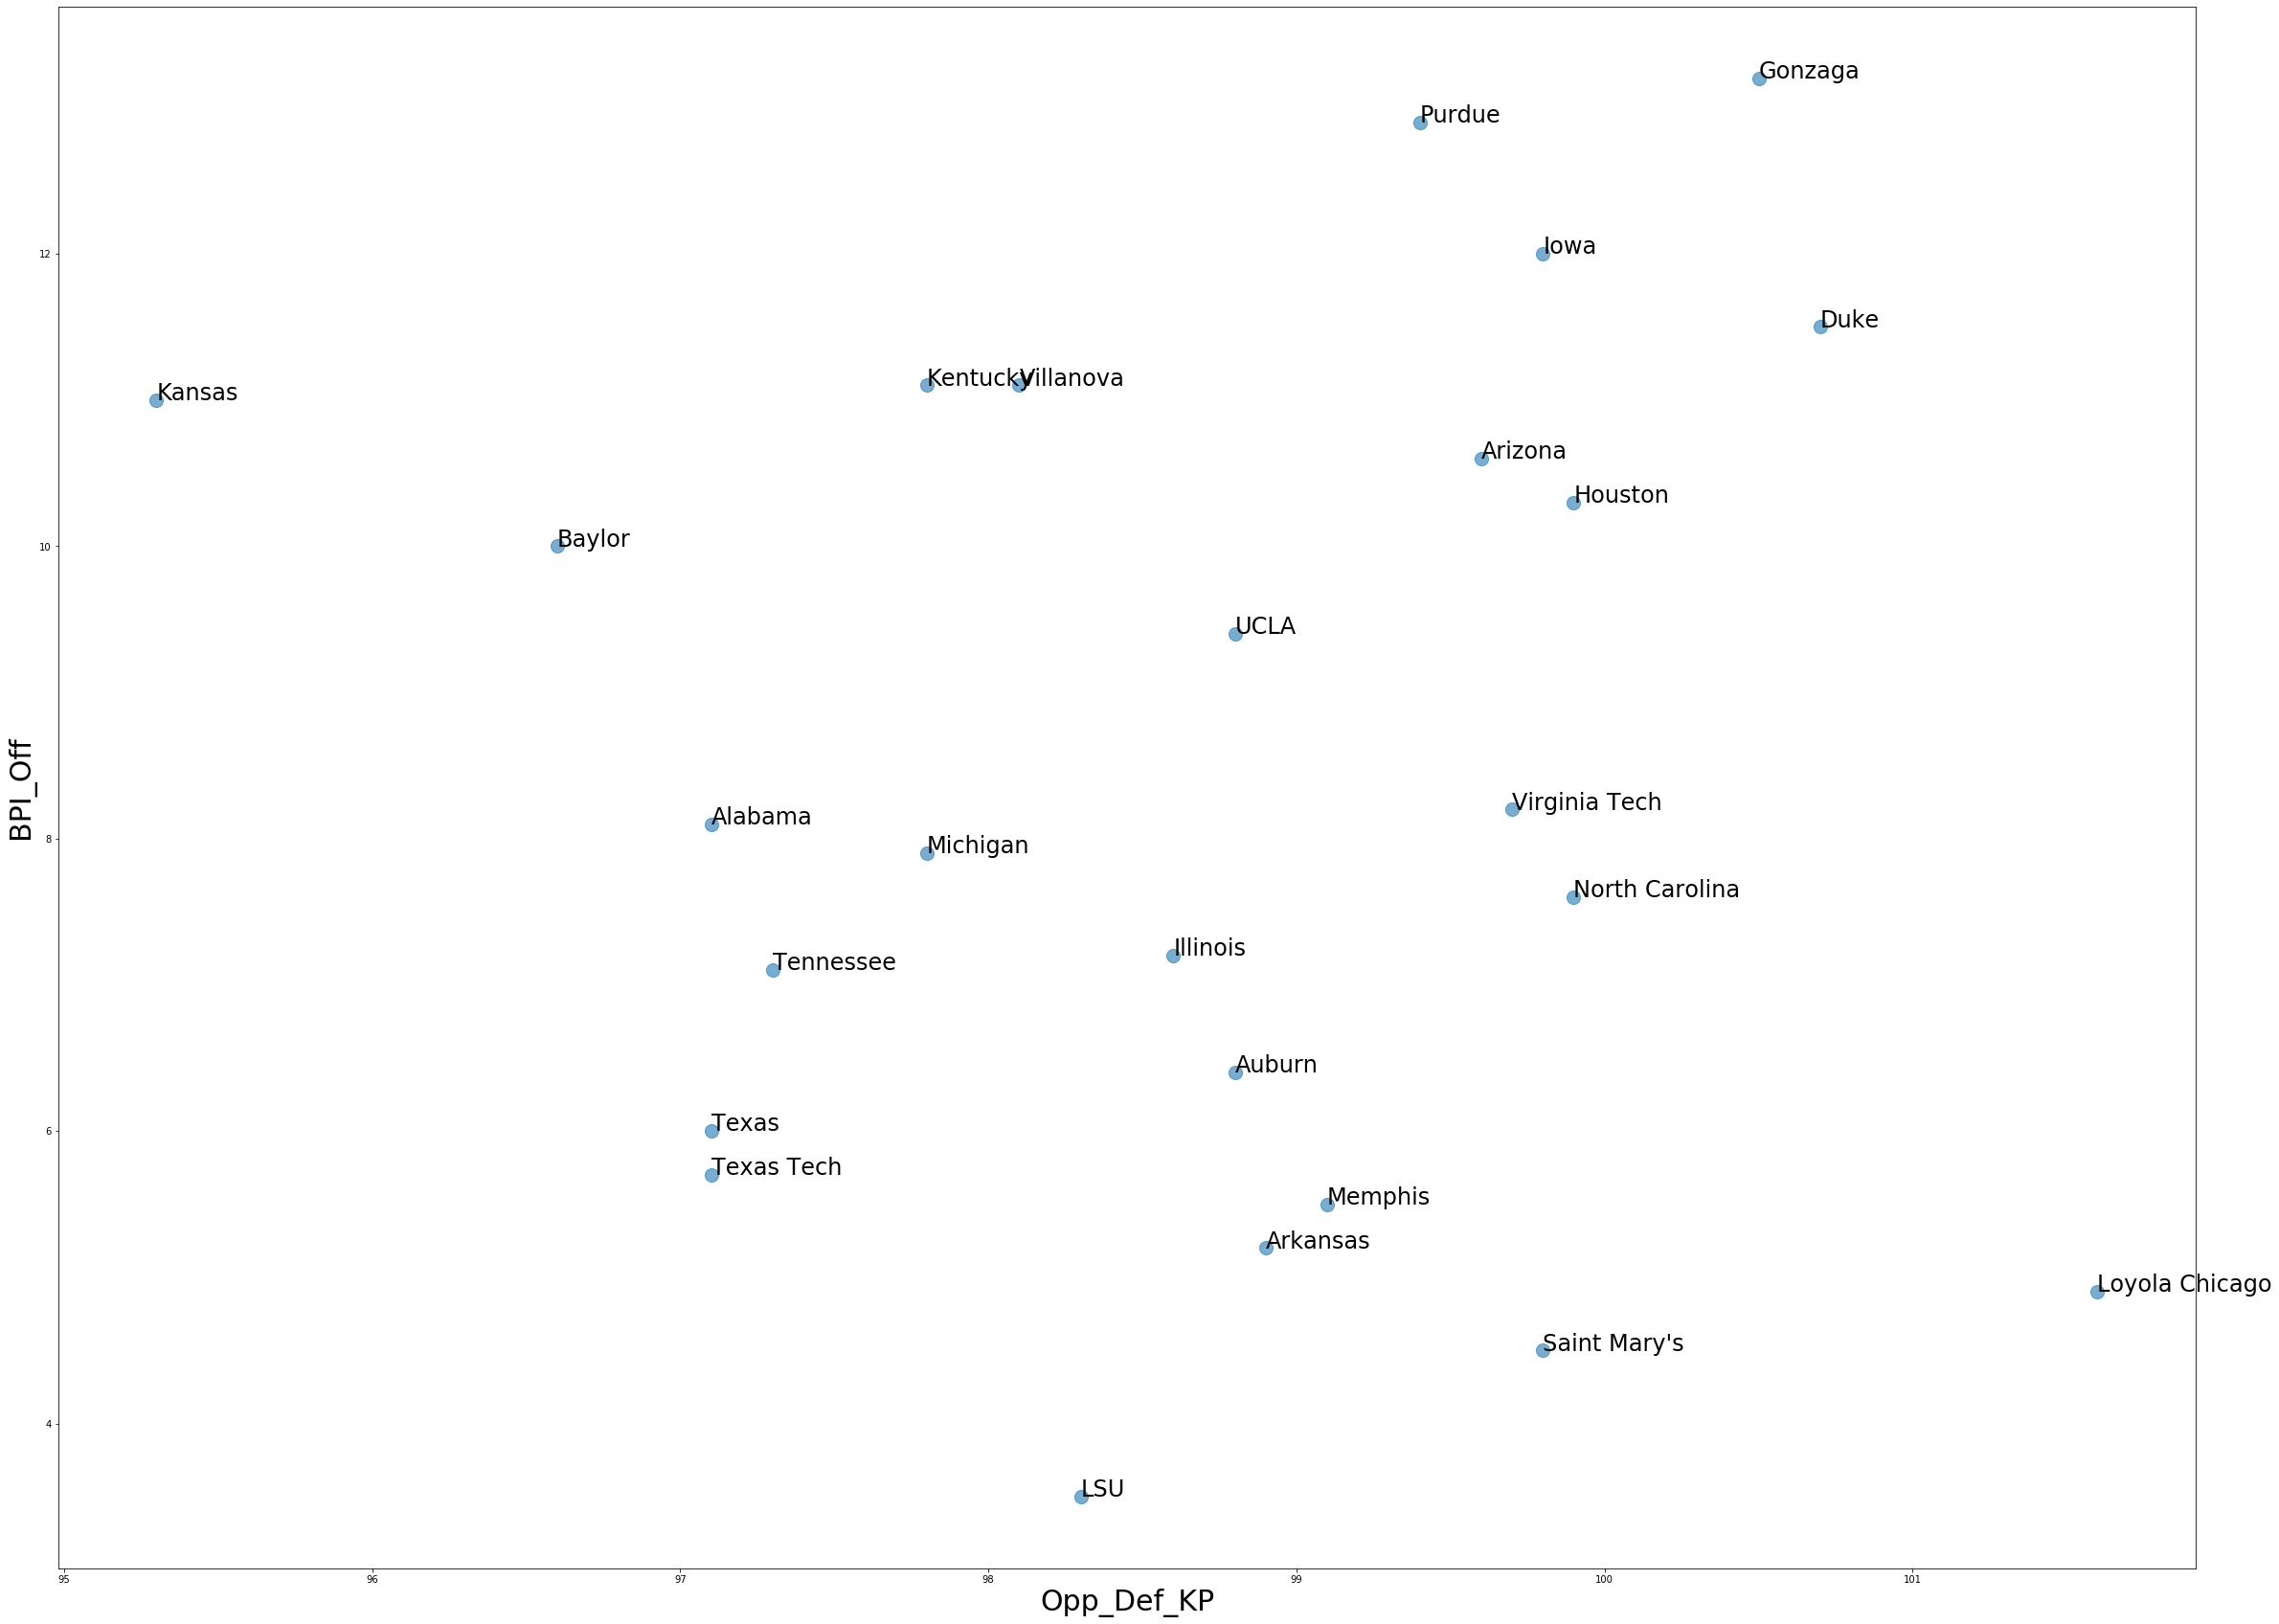

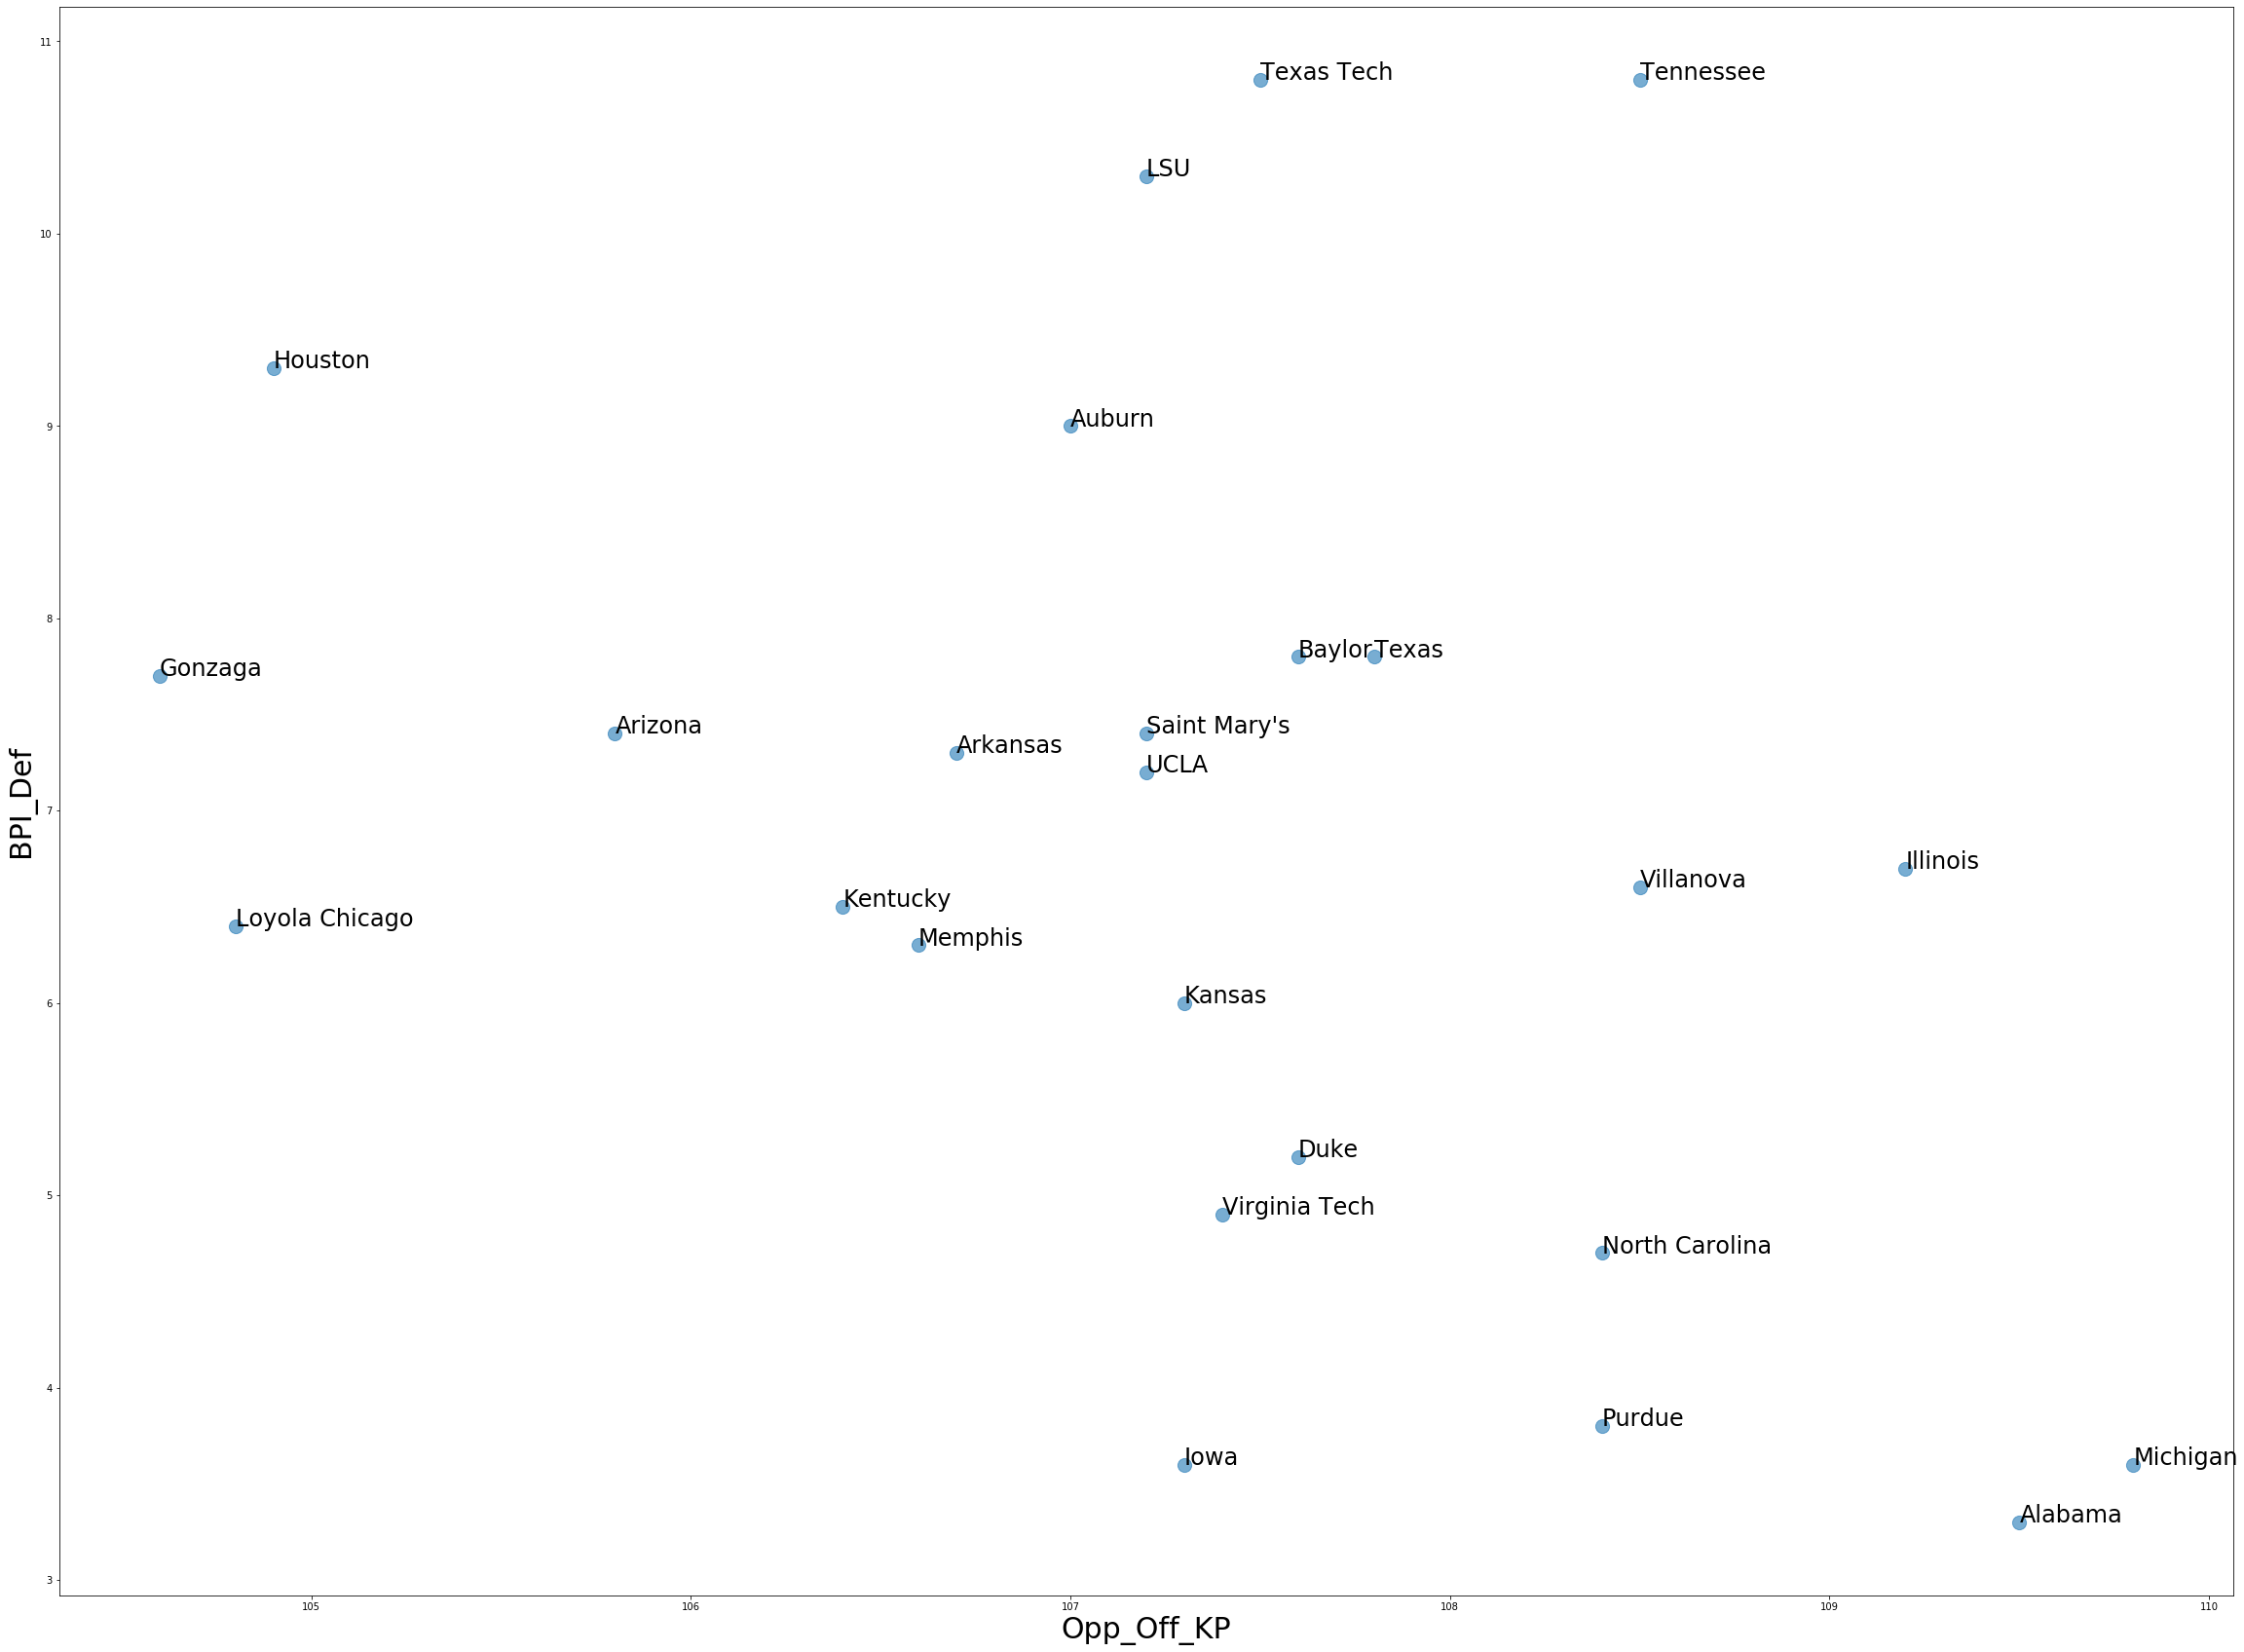

In [25]:
scatter_plot(NCAAB[:25], "Opp_Def_KP", "BPI_Off", False)
scatter_plot(NCAAB[:25], "Opp_Off_KP", "BPI_Def", False)